#**Riyadh** **City** **Airbnb**

<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/69450217-6cee2780-0d3b-11ea-947b-461ea407da85.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>




# **Exploratory Data Analysis - EDA**

**Import Libraries & Setup**

**Purpose:** Load essential libraries, configure plotting defaults, and prepare the environment.

In [12]:
# Import core libraries

import numpy as np
import pandas as pd
import csv
import json
import logging
from datetime import datetime

# Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

# sklearn imports used later in pipeline/ML blocks
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder , MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans

import random
random.seed(42)
np.random.seed(42)


# Other utilities
import joblib
import shap
import warnings
warnings.filterwarnings('ignore')

# Plotting defaults
sns.set(style="whitegrid", rc={'figure.figsize':(10,5)})
pd.options.display.max_columns = 200

**Outcome:** Environment is ready for analysis, with visualization style and library versions set.

**Load Dataset**

**Purpose:** Import Airbnb dataset for analysis.

In [13]:
#Load data

Airbnb = pd.read_excel('airbnb_updated.xlsx')

In [14]:
# Quick check (versions)

print("pandas", pd.__version__, "numpy", np.__version__)
try:
    import sklearn
    print("sklearn", sklearn.__version__)
except:
    pass
try:
    print("shap", shap.__version__)
except:
    pass

pandas 2.2.2 numpy 2.0.2
sklearn 1.6.1
shap 0.48.0


**Outcome:** Dataset successfully loaded (Airbnb data, ~2360 rows × 20 columns).

**Quick Overview**

**Purpose:** Get initial dataset insights (shape, head/tail, datatypes).

In [15]:
# Quick overview

print("\nDataset Shape:", Airbnb.shape)
display(Airbnb.head(3))
display(Airbnb.tail(3))
Airbnb.info()


Dataset Shape: (2360, 20)


property_id                              name  bathrooms  bedrooms  \
0  1002133271483358793  Big studio with private entrance        1.0         1   
1  1002133271483358793  Big studio with private entrance        1.0         1   
2  1002133271483358793  Big studio with private entrance        1.0         1   

   beds    city  isSuperhost      lat       lng  persons  reviewsCount  \
0     1  Riyadh         True  24.8199  46.72703        2             9   
1     1  Riyadh         True  24.8199  46.72703        2             9   
2     1  Riyadh         True  24.8199  46.72703        2             9   

   rating      property_type   owner_Id  \
0     5.0  Entire guesthouse  412783850   
1     5.0  Entire guesthouse  412783850   
2     5.0  Entire guesthouse  412783850   

                                 address  \
0  Riyadh, Riyadh Province, Saudi Arabia   
1  Riyadh, Riyadh Province, Saudi Arabia   
2  Riyadh, Riyadh Province, Saudi Arabia   

                                          amenityIds     cancelPolicy  \
0  [1, 4, 5, 8, 9, 73, 137, 77, 79, 657, 86, 89, ...  CANCEL_MODERATE   
1  [1, 4, 5, 8, 9, 73, 137, 77, 79, 657, 86, 89, ...  CANCEL_MODERATE   
2  [1, 4, 5, 8, 9, 73, 137, 77, 79, 657, 86, 89, ...  CANCEL_MODERATE   

                                         price_items             check_in  \
0  {'rate': 76, 'currency': 'USD', 'total': 980, ...           2024-11-24   
1  {'rate': 76, 'currency': 'USD', 'total': 1282,...  2024-11-26 00:00:00   
2  {'rate': 76, 'currency': 'USD', 'total': 602, ...           2024-11-27   

    check_out  
0  2024-12-07  
1  2024-12-13  
2  2024-12-05

property_id                              name  bathrooms  \
2357  990534577913172496       Modern & Cozy Apartment - 2        2.0   
2358  990534577913172496       Modern & Cozy Apartment - 2        2.0   
2359  992845734022008513  Apartment full of all your needs        1.0   

      bedrooms  beds    city  isSuperhost        lat        lng  persons  \
2357         3     4  Riyadh         True  24.827003  46.736704        6   
2358         3     4  Riyadh         True  24.827003  46.736704        6   
2359         1     1  Riyadh         True  24.789480  46.615830        2   

      reviewsCount  rating       property_type   owner_Id  \
2357            45    4.84  Entire rental unit  271363050   
2358            45    4.84  Entire rental unit  271363050   
2359             5    4.40  Entire rental unit  498129881   

                                    address  \
2357  Riyadh, Riyadh Province, Saudi Arabia   
2358  Riyadh, Riyadh Province, Saudi Arabia   
2359  Riyadh, Riyadh Province, Saudi Arabia   

                                             amenityIds  \
2357  [1, 33, 611, 4, 5, 37, 8, 40, 9, 41, 73, 11, 1...   
2358  [1, 33, 611, 4, 5, 37, 8, 40, 9, 41, 73, 11, 1...   
2359  [1, 33, 34, 4, 5, 8, 9, 47, 51, 52, 90, 27, 91...   

                                cancelPolicy  \
2357                         CANCEL_FLEXIBLE   
2358                         CANCEL_FLEXIBLE   
2359  CANCEL_BETTER_STRICT_WITH_GRACE_PERIOD   

                                            price_items    check_in  \
2357  {'rate': 160, 'currency': 'USD', 'total': 319,...  2024-12-27   
2358  {'rate': 160, 'currency': 'USD', 'total': 478,...  2024-12-28   
2359  {'rate': 1344, 'currency': 'USD', 'total': Non...  2024-10-25   

       check_out  
2357  2024-12-29  
2358  2024-12-31  
2359  2024-12-03

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    2360 non-null   int64  
 1   name           2360 non-null   object 
 2   bathrooms      2355 non-null   float64
 3   bedrooms       2360 non-null   int64  
 4   beds           2360 non-null   int64  
 5   city           2360 non-null   object 
 6   isSuperhost    2360 non-null   bool   
 7   lat            2360 non-null   float64
 8   lng            2360 non-null   float64
 9   persons        2360 non-null   int64  
 10  reviewsCount   2360 non-null   int64  
 11  rating         1660 non-null   float64
 12  property_type  2360 non-null   object 
 13  owner_Id       2360 non-null   int64  
 14  address        2360 non-null   object 
 15  amenityIds     2360 non-null   object 
 16  cancelPolicy   2360 non-null   object 
 17  price_items    2360 non-null   object 
 18  check_in

**Outcome:**

- Dataset shape confirmed (2360 × 20).

- Data types identified (numeric vs categorical).

- Missing values observed in some columns (e.g., bathrooms, rating).

**Identify Numeric & Categorical Columns**

**Purpose:** Facilitate summary statistics and preprocessing by classifying columns.

In [16]:
# Numeric columns

numeric_cols = Airbnb.select_dtypes(include=[np.number]).columns.tolist()
# Exclude high-cardinality numeric-like columns (IDs, timestamps)
high_cardinality = [c for c in numeric_cols if Airbnb[c].nunique() / len(Airbnb) > 0.95]
numeric_cols = [c for c in numeric_cols if c not in high_cardinality]
if high_cardinality:
    print("Excluding high-cardinality numeric columns:", high_cardinality)

# Categorical columns
categorical_cols = (Airbnb.select_dtypes(include=['object','category']).columns.tolist()
                    + Airbnb.select_dtypes(include='boolean').columns.tolist())

print("\nNumeric columns (selected):", numeric_cols)
print("Categorical columns (selected):", categorical_cols)


Numeric columns (selected): ['property_id', 'bathrooms', 'bedrooms', 'beds', 'lat', 'lng', 'persons', 'reviewsCount', 'rating', 'owner_Id']
Categorical columns (selected): ['name', 'city', 'property_type', 'address', 'amenityIds', 'cancelPolicy', 'price_items', 'check_in', 'check_out', 'isSuperhost']


**Outcome:** Numeric and categorical features clearly separated, ready for analysis.

**Statistical Summary & Missing Values**

**Purpose:** Explore data distribution and missing value patterns.


--- Describe (numeric + object summary) ---


count unique  \
property_id    2360.0    NaN   
name             2360    378   
bathrooms      2355.0    NaN   
bedrooms       2360.0    NaN   
beds           2360.0    NaN   
city             2360      6   
isSuperhost      2360      2   
lat            2360.0    NaN   
lng            2360.0    NaN   
persons        2360.0    NaN   
reviewsCount   2360.0    NaN   
rating         1660.0    NaN   
property_type    2360     17   
owner_Id       2360.0    NaN   
address          2360     10   
amenityIds       2360    366   
cancelPolicy     2360      4   
price_items      2360   1548   
check_in         2360     43   
check_out        2360     37   

                                                             top  freq  \
property_id                                                  NaN   NaN   
name                                        2A studio in Al-Aqiq    41   
bathrooms                                                    NaN   NaN   
bedrooms                                                     NaN   NaN   
beds                                                         NaN   NaN   
city                                                      Riyadh  2292   
isSuperhost                                                False  1423   
lat                                                          NaN   NaN   
lng                                                          NaN   NaN   
persons                                                      NaN   NaN   
reviewsCount                                                 NaN   NaN   
rating                                                       NaN   NaN   
property_type                                 Entire rental unit  1922   
owner_Id                                                     NaN   NaN   
address                    Riyadh, Riyadh Province, Saudi Arabia  2272   
amenityIds                               [1, 51, 4, 52, 5, 8, 9]    57   
cancelPolicy                                     CANCEL_FLEXIBLE  1795   
price_items    {'rate': 1410, 'currency': 'USD', 'total': Non...    10   
check_in                                              2024-11-01   200   
check_out                                             2024-12-24   160   

                                mean                   std         min  \
property_id    1047111157349399808.0  285906155290788576.0  20023187.0   
name                             NaN                   NaN         NaN   
bathrooms                   1.162845              0.521337         0.0   
bedrooms                    1.113983              0.518557         0.0   
beds                        1.172881              0.790325         0.0   
city                             NaN                   NaN         NaN   
isSuperhost                      NaN                   NaN         NaN   
lat                        24.782615              0.052587    24.47186   
lng                        46.667073              0.064399   46.423872   
persons                     2.827119              1.540394         1.0   
reviewsCount                20.30678             34.899698         0.0   
rating                      4.902795              0.148337         3.5   
property_type                    NaN                   NaN         NaN   
owner_Id            406558836.008898      162349152.782683    299917.0   
address                          NaN                   NaN         NaN   
amenityIds                       NaN                   NaN         NaN   
cancelPolicy                     NaN                   NaN         NaN   
price_items                      NaN                   NaN         NaN   
check_in                         NaN                   NaN         NaN   
check_out                        NaN                   NaN         NaN   

                                 25%                    50%  \
property_id    1017131192257776640.0  1137009710973977472.0   
name                             NaN                    NaN   
bathrooms                        1.0        


--- Missing values summary (top 30) ---


Missing  Percent
rating             700    29.66
bathrooms            5     0.21
name                 0     0.00
property_id          0     0.00
bedrooms             0     0.00
beds                 0     0.00
isSuperhost          0     0.00
city                 0     0.00
lat                  0     0.00
lng                  0     0.00
persons              0     0.00
reviewsCount         0     0.00
property_type        0     0.00
owner_Id             0     0.00
address              0     0.00
amenityIds           0     0.00
cancelPolicy         0     0.00
price_items          0     0.00
check_in             0     0.00
check_out            0     0.00

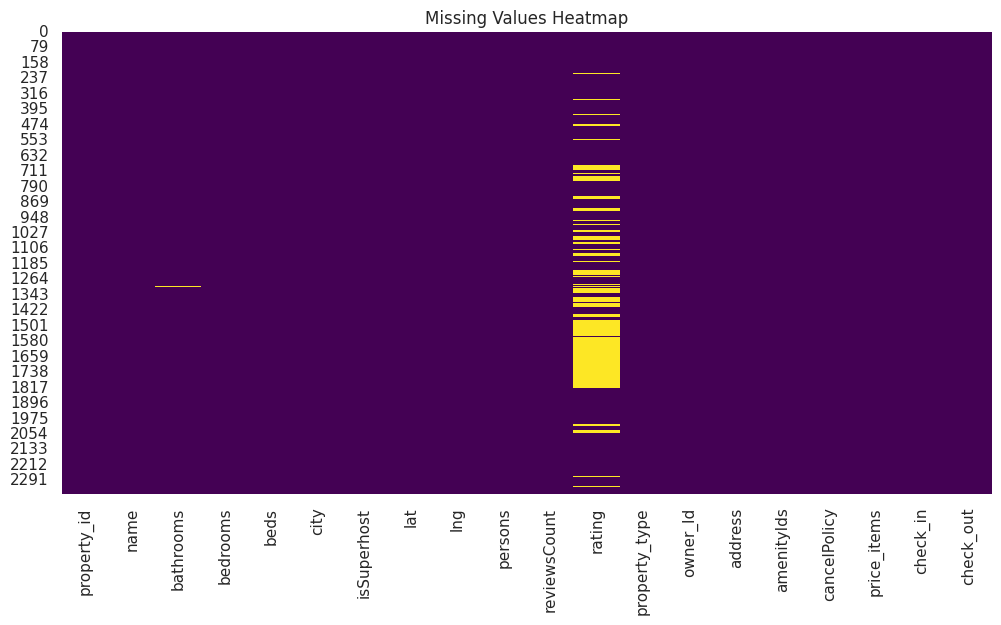

In [18]:
# Statistical Summary & Missing Values

print("\n--- Describe (numeric + object summary) ---")
display(Airbnb.describe(include='all').T)

missing = Airbnb.isnull().sum()
missing_percent = (missing / len(Airbnb) * 100).round(2)
missing_summary = pd.DataFrame({'Missing': missing, 'Percent': missing_percent})
print("\n--- Missing values summary (top 30) ---")
display(missing_summary.sort_values(by='Percent', ascending=False).head(30))

# Missing values heatmap
plt.figure(figsize=(12,6))
sns.heatmap(Airbnb.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

**Outcome:**

- Bathrooms: median ≈ 1, range 0–6.

- Rating: mean ≈ 4.9, std ≈ 0.15.

- Missing values concentrated in bathrooms and rating.

**Distribution of Numeric Columns**

**Purpose:** Detect skewness and potential need for transformation.

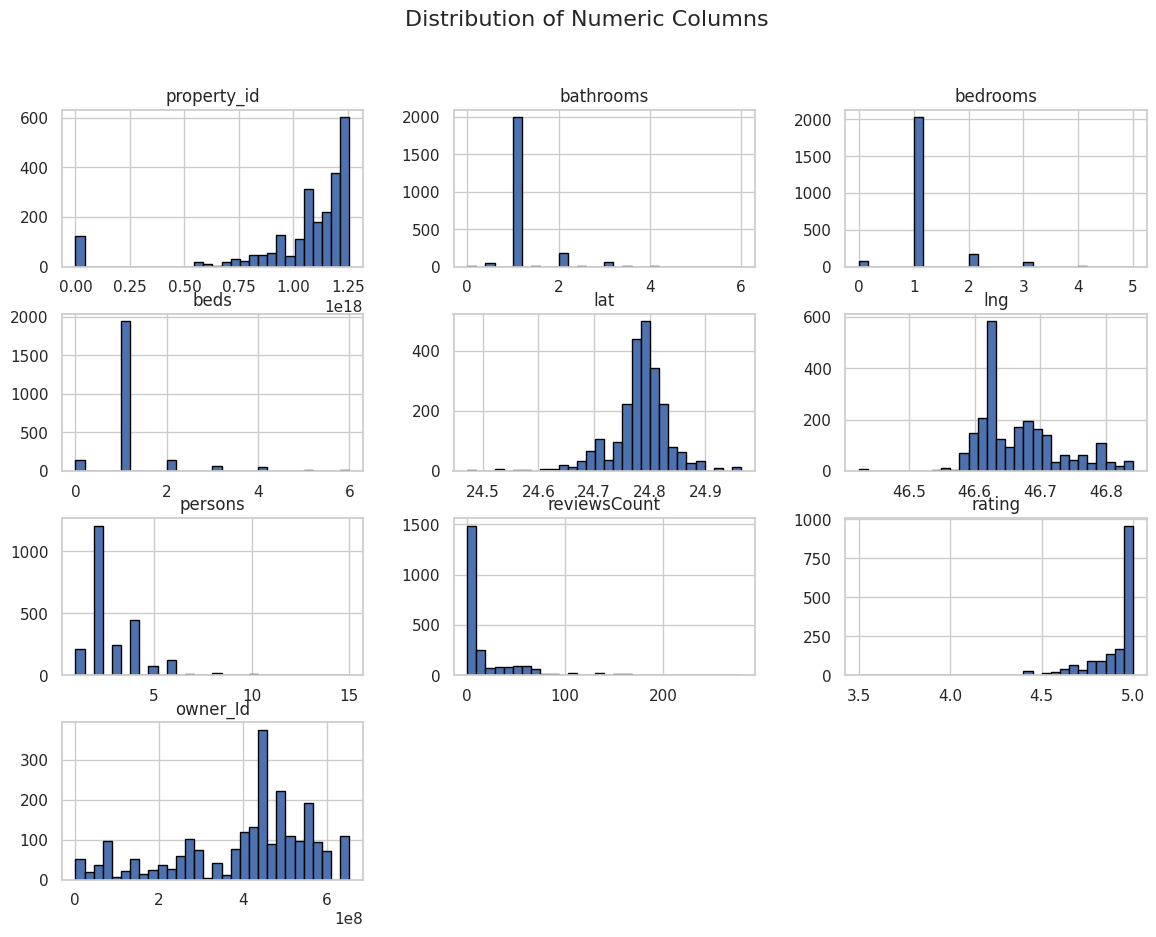

abs_skew
beds          3.076504
bathrooms     3.043773
reviewsCount  3.013291
bedrooms      2.685414
property_id   2.616336
rating        2.241522
persons       2.084423
lat           1.000176
owner_Id      0.857090
lng           0.674411

Suggested log1p transform for: ['beds', 'bathrooms', 'reviewsCount', 'bedrooms', 'property_id', 'rating', 'persons', 'lat']


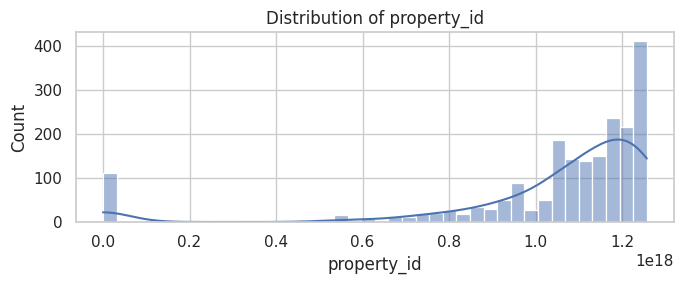

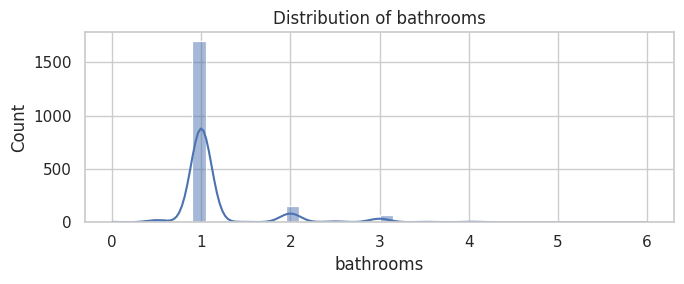

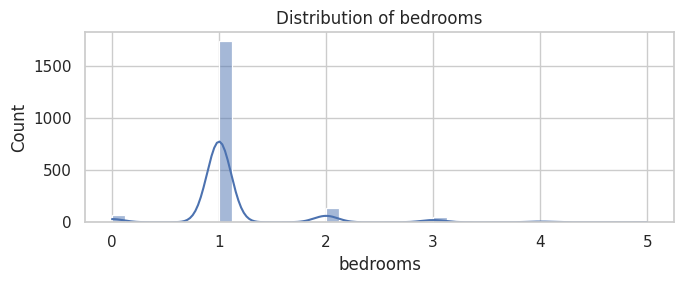

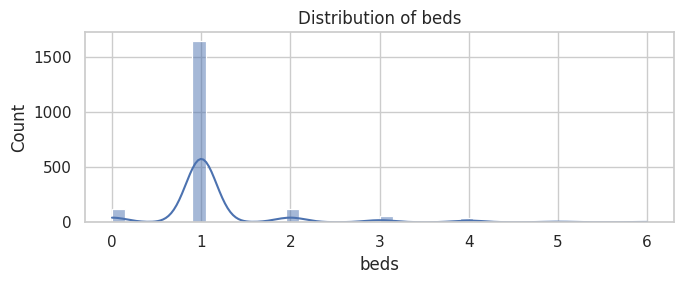

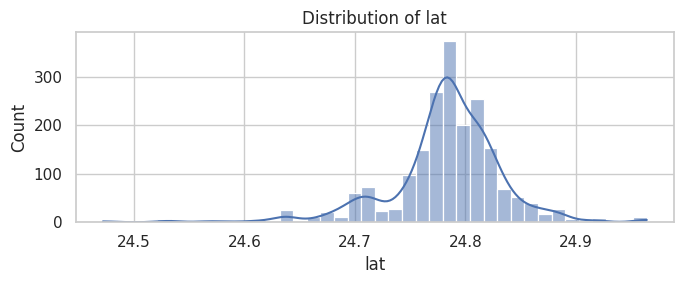

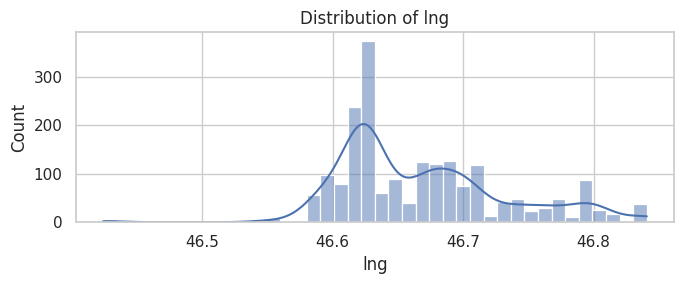

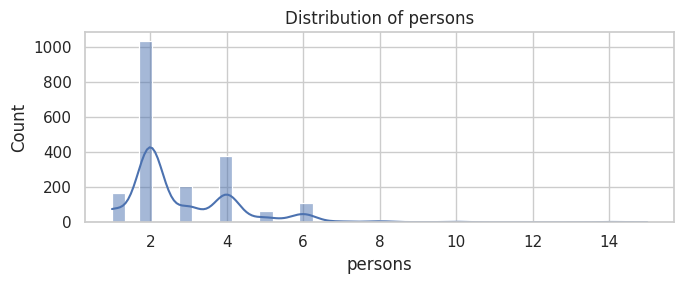

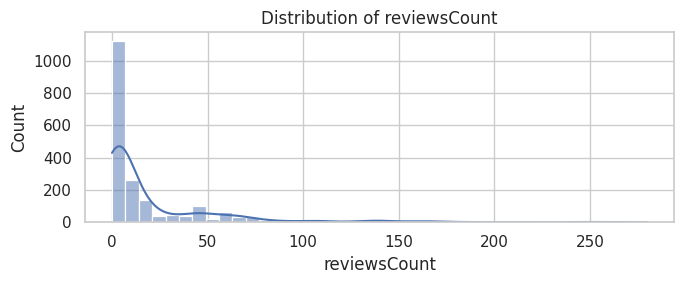

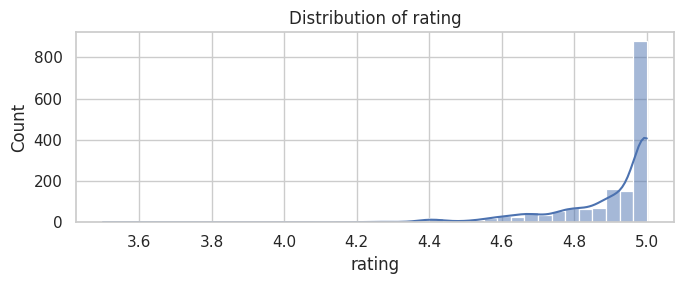

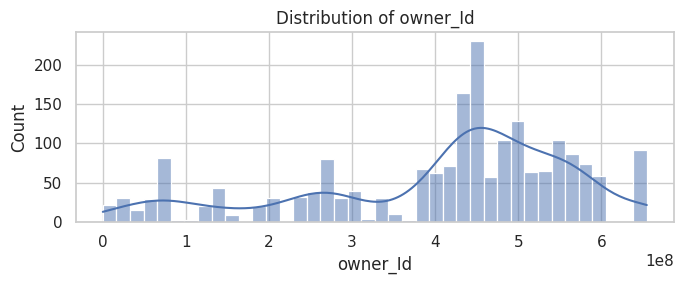

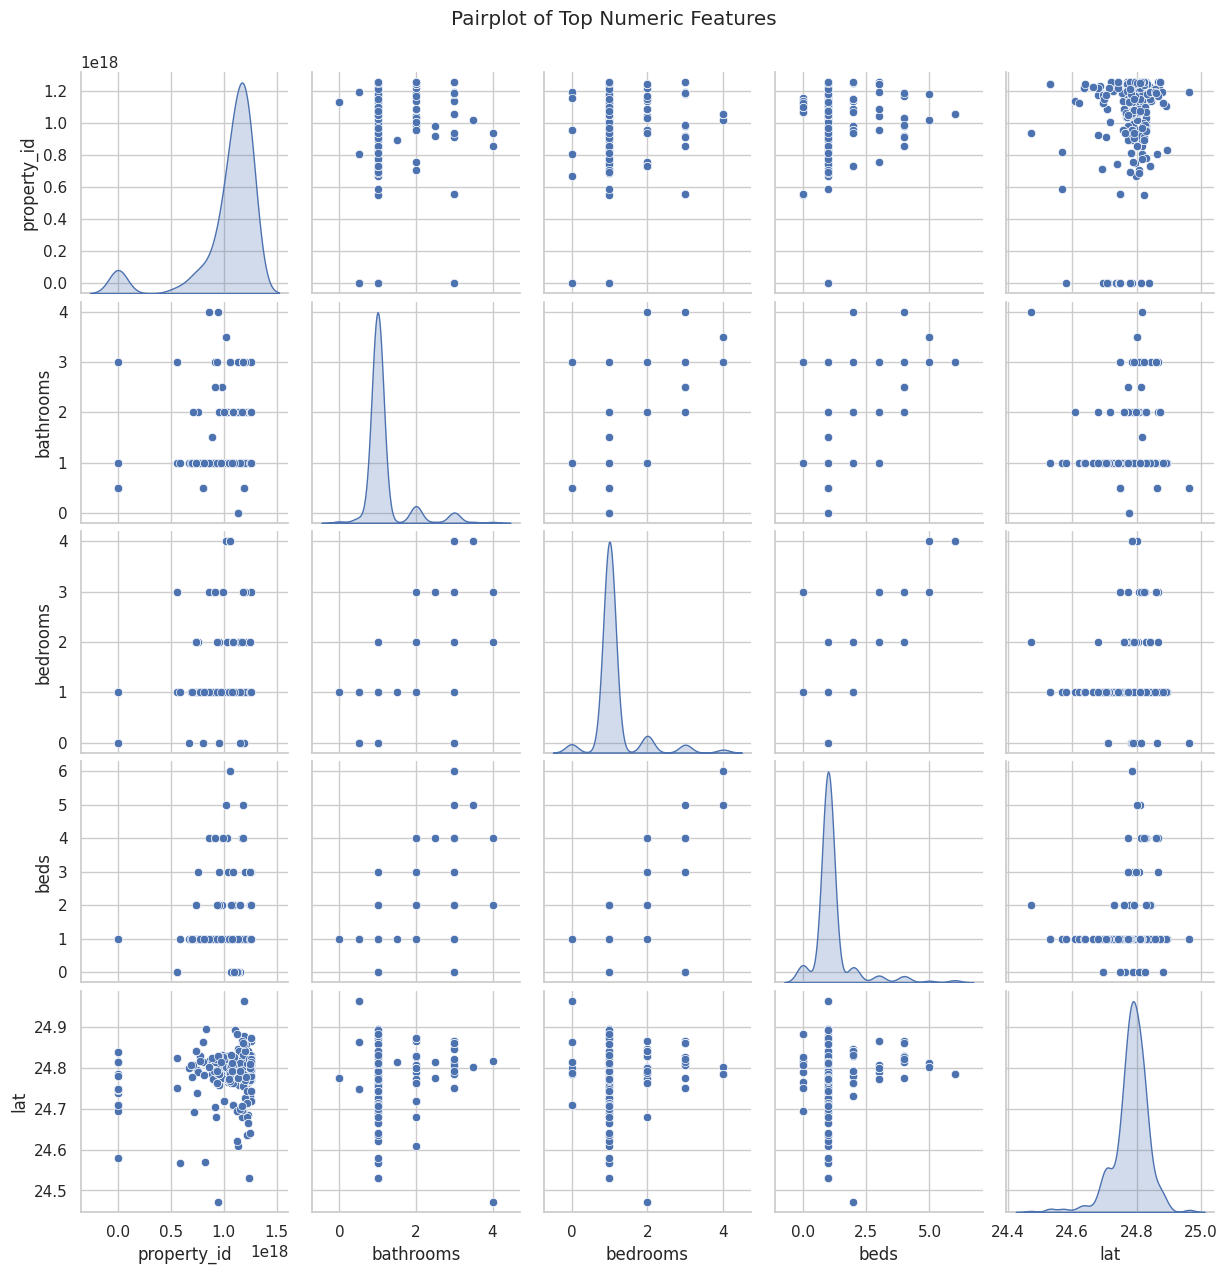

In [23]:
# Histograms

if numeric_cols:
    Airbnb[numeric_cols].hist(figsize=(14,10), bins=30, edgecolor='black')
    plt.suptitle("Distribution of Numeric Columns", fontsize=16)
    plt.show()

  # Skewness analysis
    skew_info = Airbnb[numeric_cols].skew().abs().sort_values(ascending=False)
    skew_df = pd.DataFrame({'abs_skew': skew_info})
    display(skew_df.head(20))

    suggested_log = skew_df[skew_df['abs_skew'] > 1.0].index.tolist()
    if suggested_log:
        print("Suggested log1p transform for:", suggested_log)
    else:
        print("No strong skewness detected.")

# KDE plots
for col in numeric_cols:
    plt.figure(figsize=(7,3))
    sns.histplot(Airbnb[col].dropna().sample(n=min(2000, Airbnb[col].dropna().shape[0])),
                 kde=True, bins=40)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# Pairplot for top numeric features ( top 5)
if len(numeric_cols) > 1:
    top_numeric = numeric_cols[:5]
    sns.pairplot(Airbnb[top_numeric].dropna().sample(n=min(500, len(Airbnb))), diag_kind='kde')
    plt.suptitle("Pairplot of Top Numeric Features", y=1.02)
    plt.show()

**Outcome:** Bathrooms & bedrooms → right-skewed. ReviewsCount → highly skewed → candidate for log transformation.

**Outliers Detection (Boxplots)**

**Purpose:** Visualize outliers that may distort analysis.

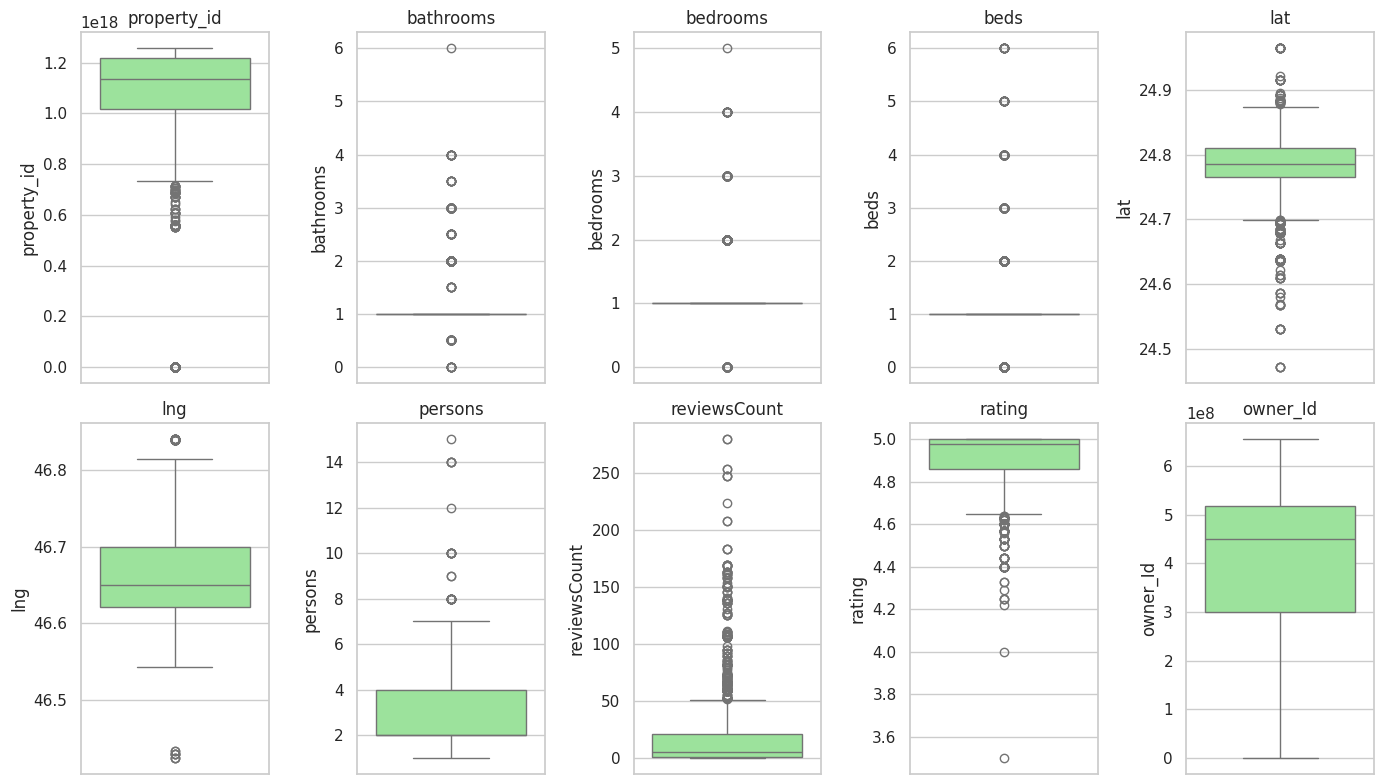

In [24]:
# Boxplots

plt.figure(figsize=(14,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, int(np.ceil(len(numeric_cols)/2)), i)
    sns.boxplot(y=Airbnb[col].dropna(), color="lightgreen")
    plt.title(col)
plt.tight_layout()
plt.show()

**Outcome:** Outliers detected in reviewsCount, rating, and beds (unrealistic highs).

**Correlation Heatmap**

**Purpose:** Identify relationships between numeric features.

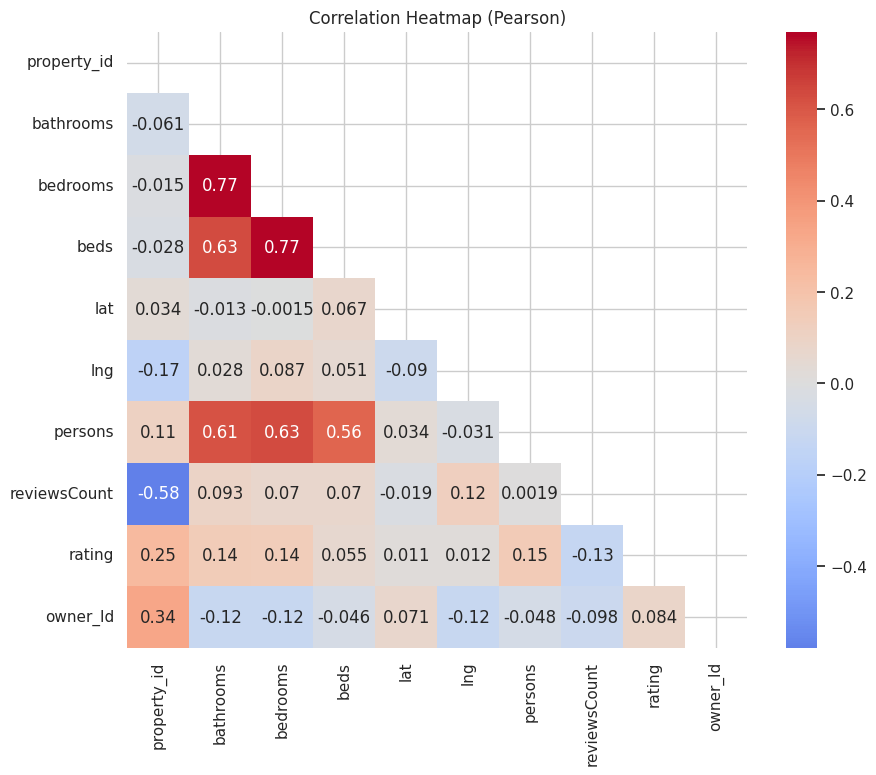

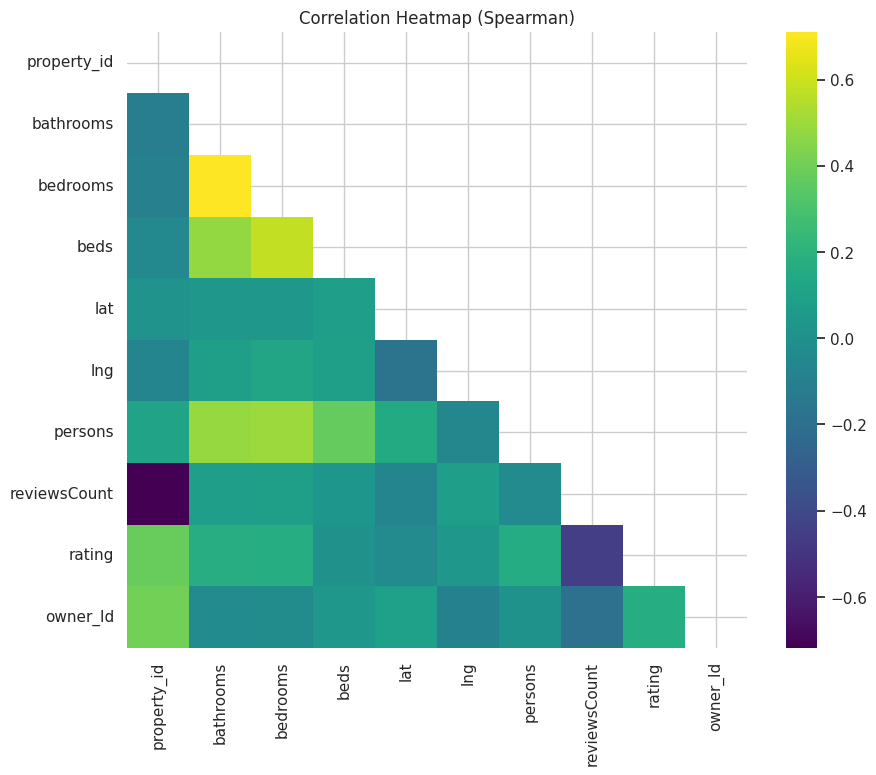

In [25]:
# Correlation Heatmap

if len(numeric_cols) >= 2:
    corr = Airbnb[numeric_cols].corr(method='pearson')
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", mask=mask, center=0)
    plt.title("Correlation Heatmap (Pearson)")
    plt.show()

    corr_spearman = Airbnb[numeric_cols].corr(method='spearman')
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_spearman, cmap="viridis", mask=mask)
    plt.title("Correlation Heatmap (Spearman)")
    plt.show()

**Outcome:** Bedrooms ↔ Beds strongly correlated; Rating weakly correlated with ReviewsCount.


**Categorical Columns Analysis**

**Purpose:** Understand categorical feature distributions.

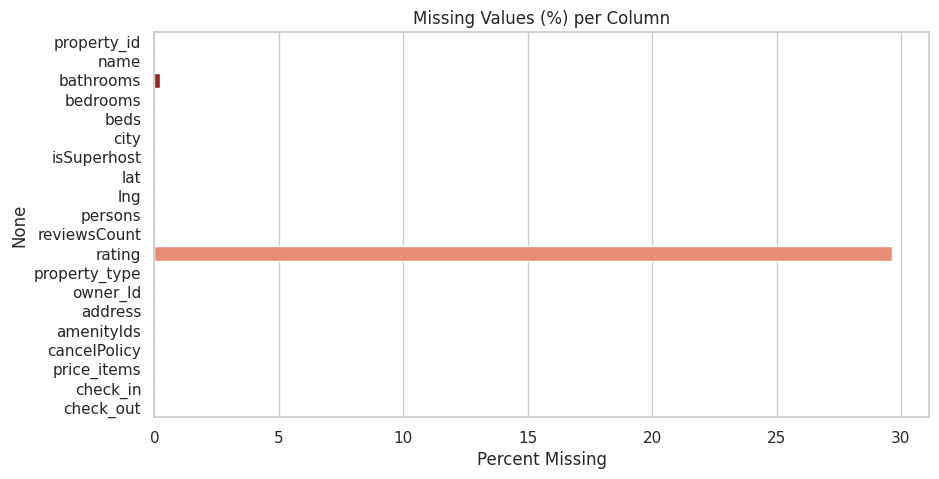

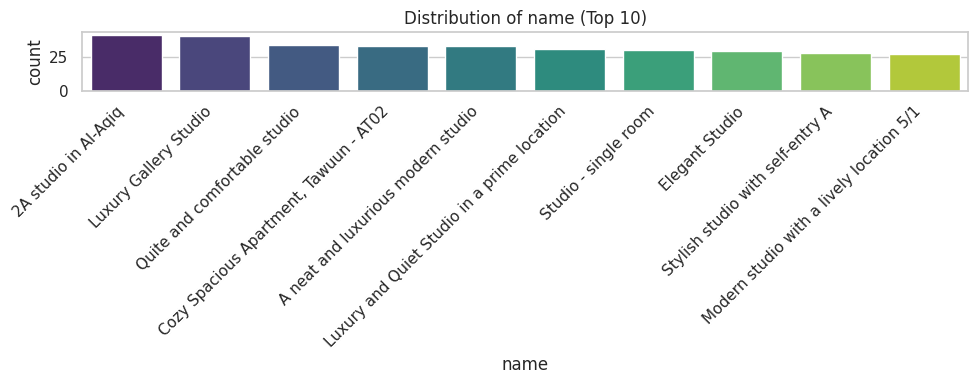

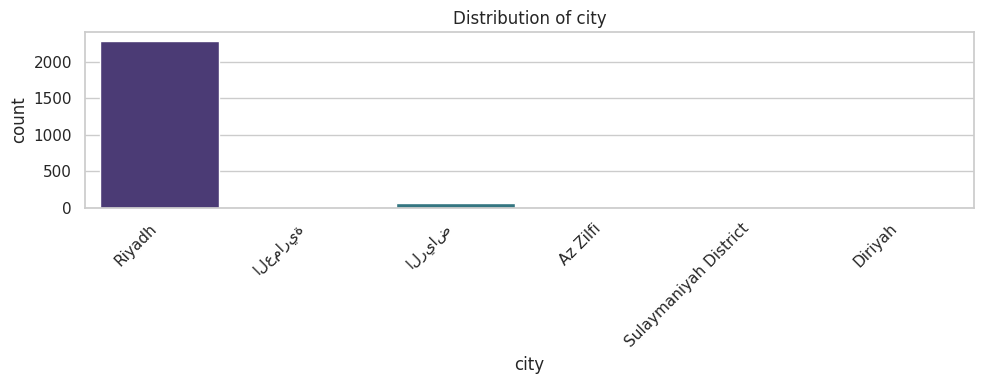

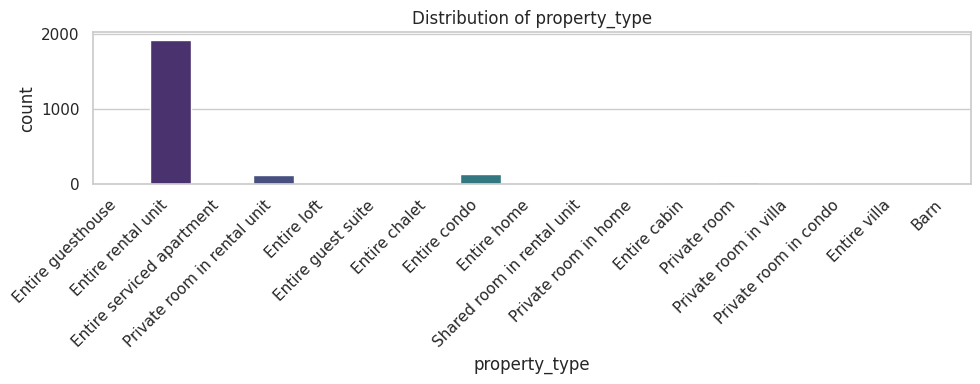

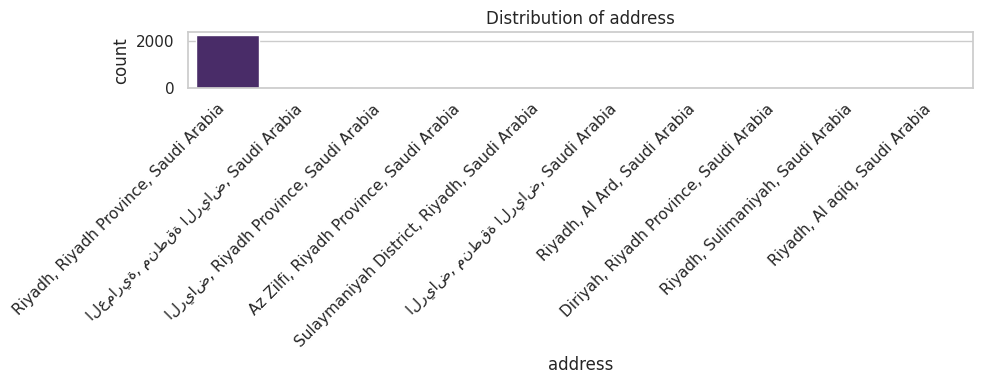

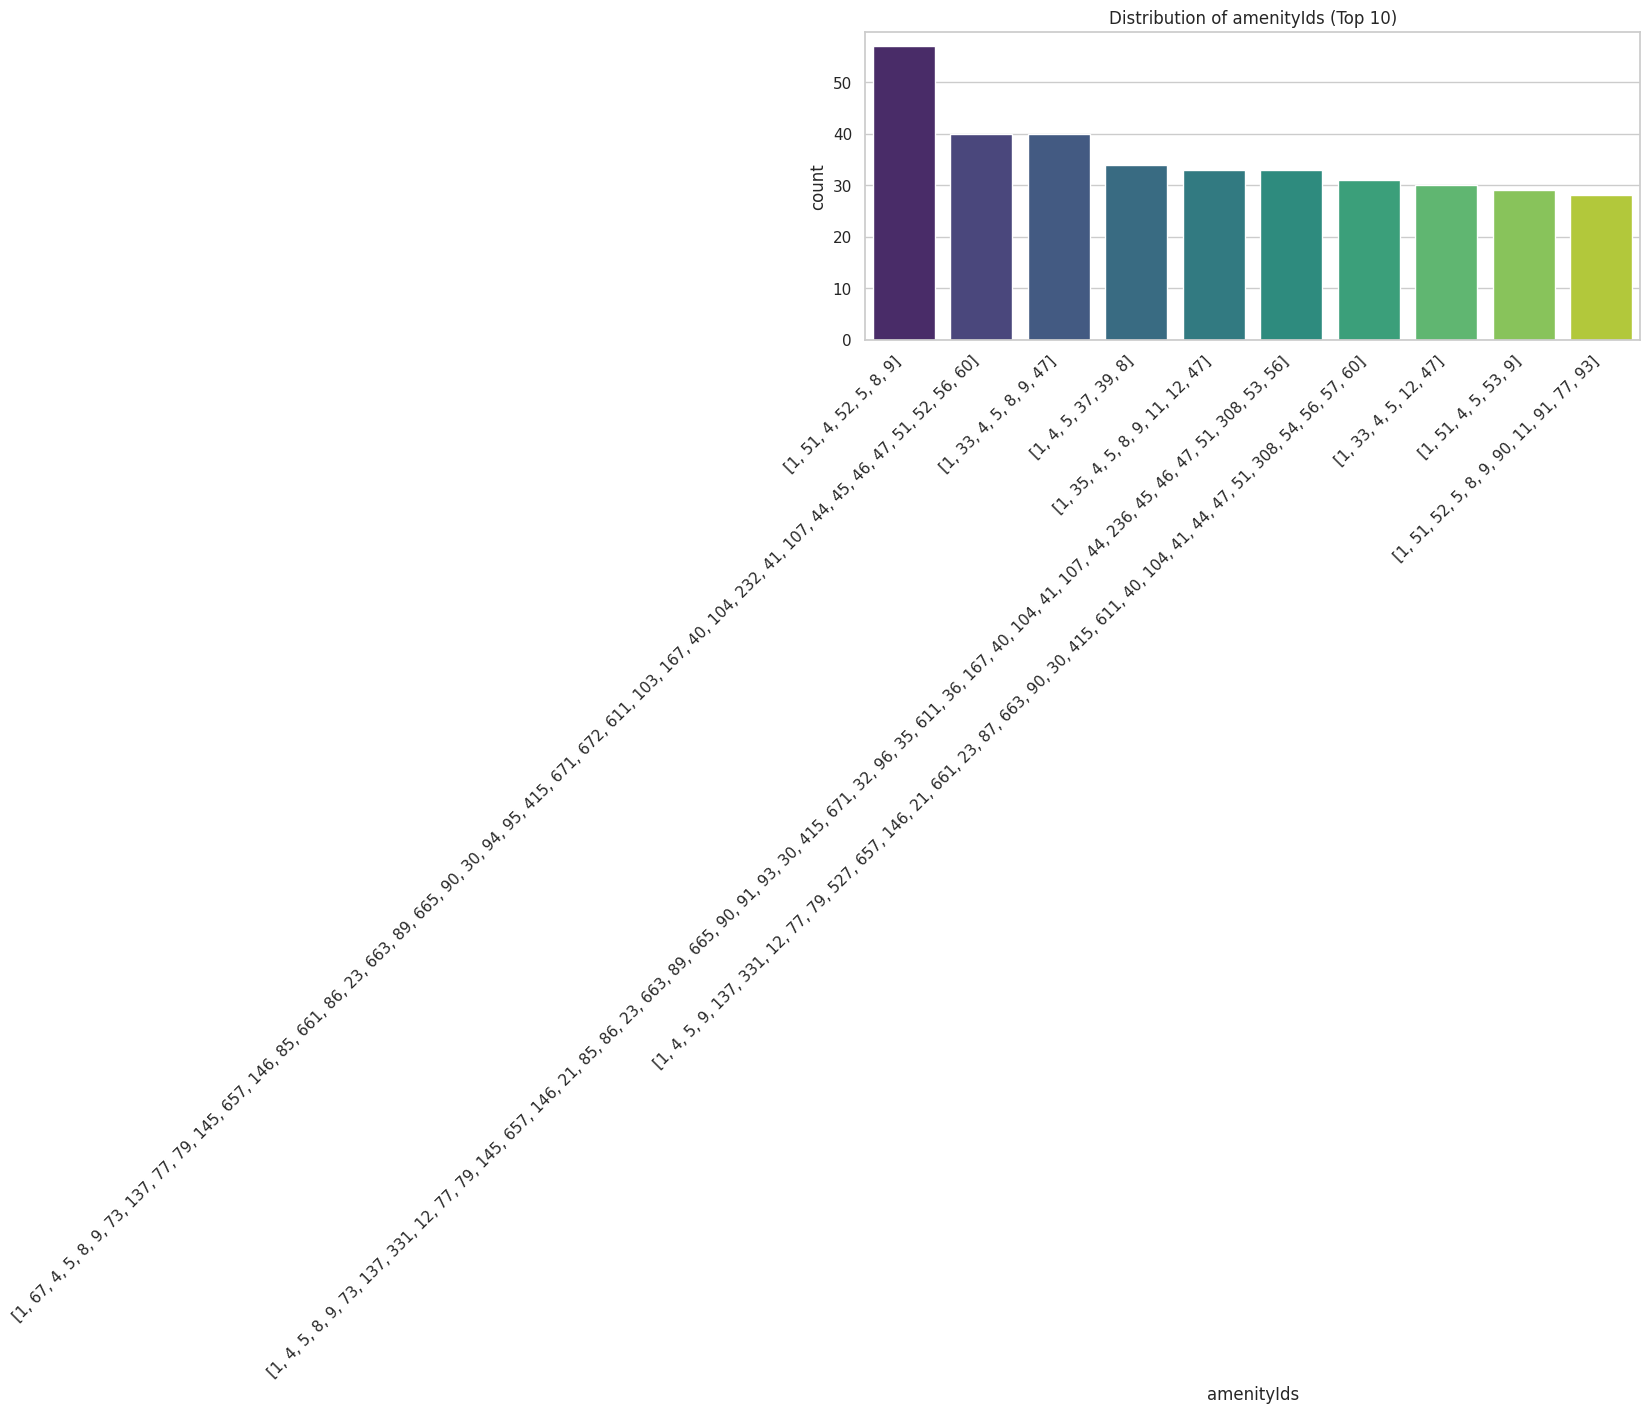

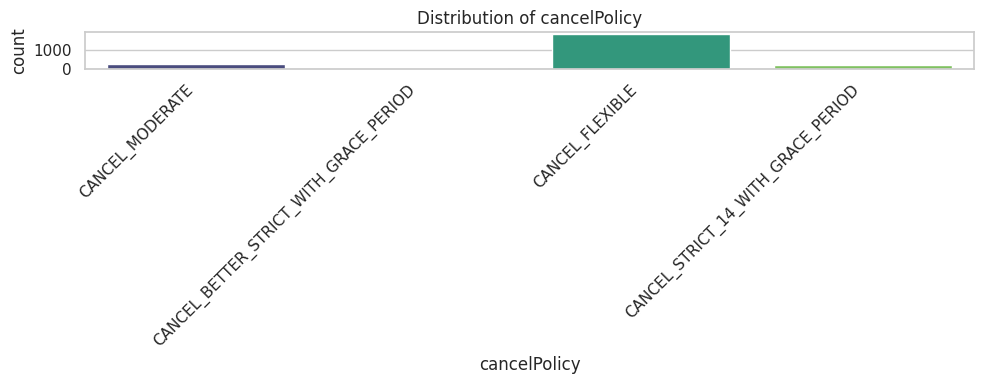

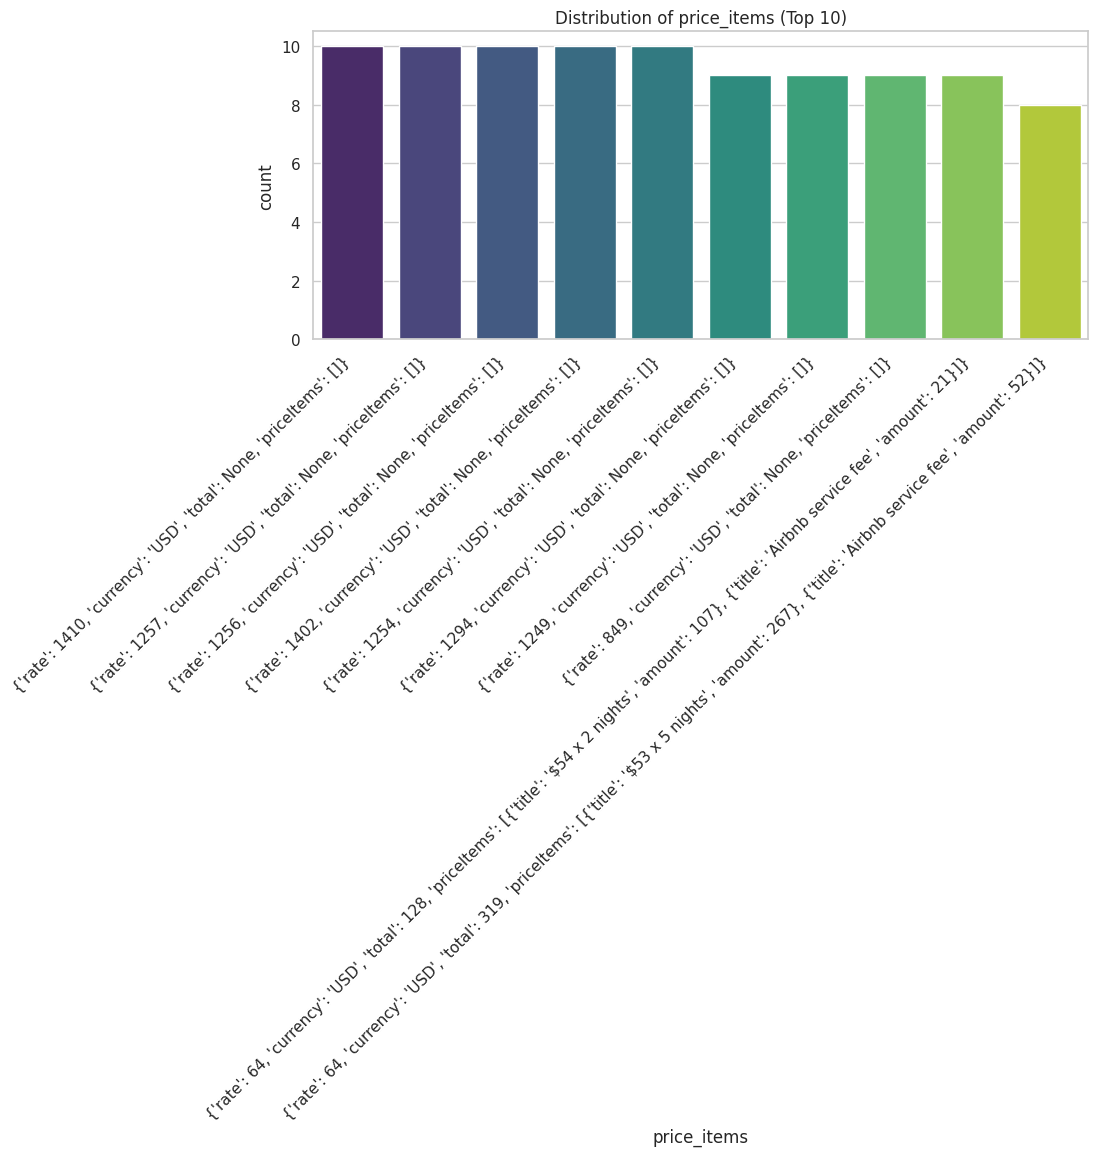

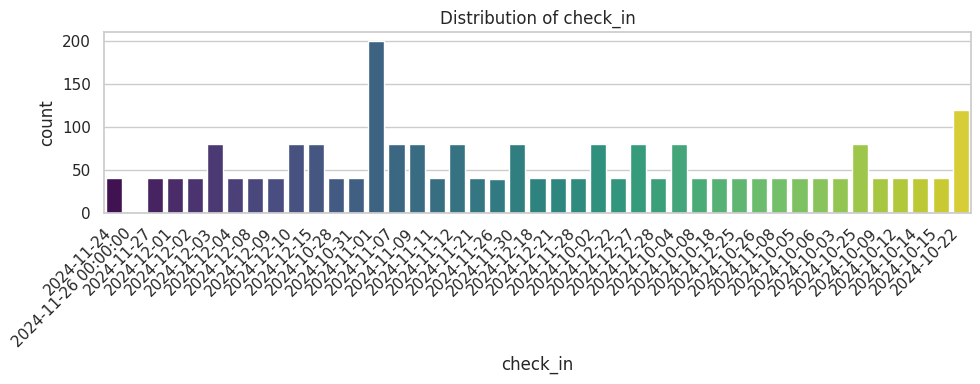

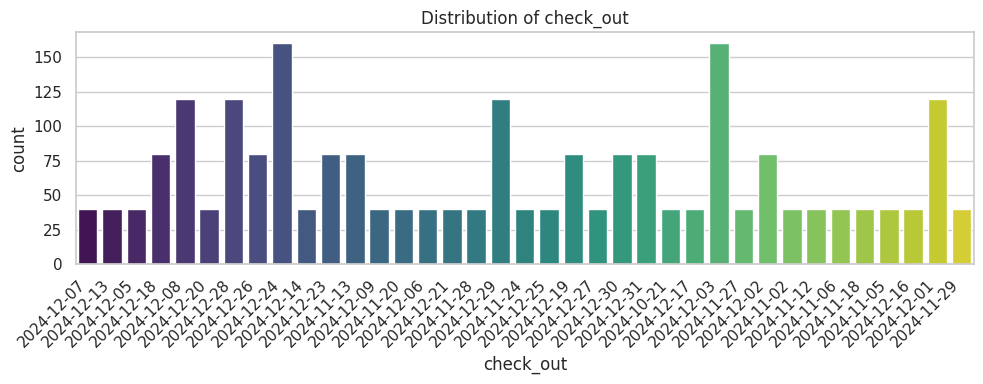

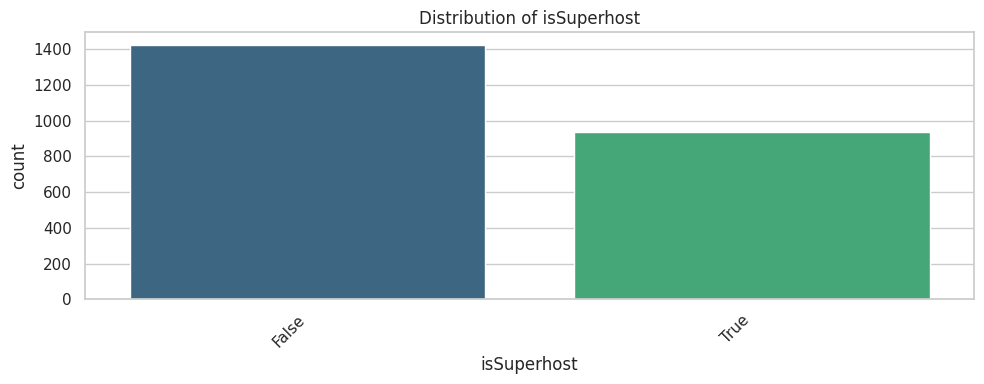

In [26]:
# Categorical Columns Analysis

plt.figure(figsize=(10,5))
sns.barplot(x=missing_summary['Percent'], y=missing_summary.index, palette="Reds_r")
plt.title("Missing Values (%) per Column")
plt.xlabel("Percent Missing")
plt.show()

# Countplots

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    if Airbnb[col].nunique() > 50:
        top_values = Airbnb[col].value_counts(normalize=True).head(10).index
        sns.countplot(data=Airbnb, x=col, order=top_values, palette='viridis')
        plt.title(f"Distribution of {col} (Top 10)")
    else:
        sns.countplot(data=Airbnb, x=col, palette='viridis')
        plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Outcome:** Majority listings in Riyadh; Superhosts ~20%; property_type mostly “Apartment”.


**Outliers Detection (IQR vs Z-score)**

**Purpose:** Statistically quantify outliers.

In [27]:
# Compare IQR vs Z-score

def compare_outliers(df, cols, z_thresh=3):
    results = []
    n = df.shape[0]
    for col in cols:
        series = df[col].dropna()

        # IQR method
        Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        iqr_outliers = ((series < lower) | (series > upper)).sum()

        # Z-score method
        z_outliers = 0
        if series.std() > 0 and len(series) >= 2:
            z = np.abs(stats.zscore(series))
            z_outliers = (z > z_thresh).sum()
        results.append({
            "Column": col,
            "IQR_Outliers": int(iqr_outliers),
            "IQR_Percent": round(iqr_outliers / n * 100, 3),
            "ZScore_Outliers": int(z_outliers),
            "ZScore_Percent": round(z_outliers / n * 100, 3)
        })
    return pd.DataFrame(results)

# Apply
outlier_summary = compare_outliers(Airbnb, numeric_cols)
display(outlier_summary.sort_values(by='IQR_Percent', ascending=False).reset_index(drop=True))

Column  IQR_Outliers  IQR_Percent  ZScore_Outliers  ZScore_Percent
0          beds           421       17.839               78           3.305
1     bathrooms           358       15.169               90           3.814
2      bedrooms           331       14.025               79           3.347
3  reviewsCount           302       12.797               77           3.263
4           lat           214        9.068               42           1.780
5   property_id           181        7.669              125           5.297
6        rating           116        4.915               40           1.695
7           lng            49        2.076                9           0.381
8       persons            31        1.314               31           1.314
9      owner_Id             0        0.000                0           0.000

**Outcome:** ReviewsCount has the highest outliers; bathrooms & bedrooms show moderate outliers.

# **Data Cleaning & Feature Engineering**

**Missing Values Handling**

- Fill missing numeric values with median.

- Fill missing categorical values with "Unknown".

**Purpose:** Ensure dataset completeness and avoid errors during analysis.

In [28]:
# Missing Values Handling

numeric_cols = ['bathrooms', 'bedrooms', 'beds', 'persons', 'reviewsCount', 'rating']
categorical_cols = ['city', 'property_type', 'cancelPolicy']

# Fill numeric with median
Airbnb[numeric_cols] = Airbnb[numeric_cols].fillna(Airbnb[numeric_cols].median())

# Fill categorical with 'Unknown'
Airbnb[categorical_cols] = Airbnb[categorical_cols].fillna('Unknown')

# Show missing ratio
missing_ratio = Airbnb.isnull().mean()
print("Columns with missing values:\n", missing_ratio[missing_ratio > 0])

Columns with missing values:
 Series([], dtype: float64)


**Outcome:** All missing values filled; dataset is complete for further steps.

**Data Type Correction**

- Convert date columns (check_in, check_out) to datetime.

- Convert boolean column (isSuperhost).

**Purpose:** Ensure correct data types for calculations, analysis, and modeling.

In [29]:
# Data Type Correction

# Date columns
for date_col in ['check_in', 'check_out']:
    if date_col in Airbnb.columns:
        Airbnb[date_col] = pd.to_datetime(Airbnb[date_col], errors='coerce')

# Boolean columns
if 'isSuperhost' in Airbnb.columns:
    Airbnb['isSuperhost'] = (
        Airbnb['isSuperhost']
        .astype(str).str.strip().str.lower()
        .map({'true': True, 'false': False, 't': True, 'f': False, '1': True, '0': False})
    ).astype('boolean')

**Outcome:** Dates parsed correctly; Superhost stored as Boolean.

**Standardize City & Address Names**

- Map city names to unified format.

- Standardize address strings.

- Extract district from address.

**Purpose:** Create consistent location features for analysis and visualization.

In [30]:
# City mapping

city_mapping = {
    'الرياض': 'Riyadh', 'Riyadh': 'Riyadh',
    'Sulaymaniyah': 'Riyadh', 'Sulimaniyah': 'Riyadh', 'Al Sulimaniyah': 'Riyadh',
    'العمارية': 'Diriyah', 'Diriyah': 'Diriyah',
    'Az Zilfi': 'Az Zilfi'
}

# Create unified city column
Airbnb['city_unified'] = Airbnb['city'].map(city_mapping)

# Unify address
def unify_address(address):
    if pd.isnull(address): return address
    for original, unified in city_mapping.items():
        address = address.replace(original, unified)
    return address

# Apply address standardization
Airbnb['address_unified'] = Airbnb['address'].apply(unify_address)

# Extract district
# Words to ignore when extracting districts
ignore_words = ['Saudi Arabia','Province','منطقة']
city_list = list(city_mapping.values())
def extract_district(address, city_fallback):
    if pd.isnull(address): return city_fallback
    parts = [p.strip() for p in address.split(',')]
    candidates = [p for p in parts if p and p not in city_list and not any(w in p for w in ignore_words)]
    return candidates[0] if candidates else city_fallback

# Create district column
Airbnb['district'] = Airbnb.apply(
    lambda row: extract_district(row['address_unified'], row['city_unified']), axis=1
)

**Outcome:** City and address standardized; district feature extracted.

**Feature Engineering**

- Create stay duration.

- Extract total/base/fee/discount from price_items.

- Calculate price per night.

- Parse amenities → one-hot encode.

- Add engineered metrics (luxury, amenities categories, reviews per person, scaled rating).

- Generate temporal and spatial features.

**Purpose:** Enhance dataset with meaningful features for analysis and predictive modeling.

In [32]:
# Feature Engineering

# Stay Duration
# Calculate stay duration in days, replace 0 or NaN with 1 to avoid division errors
Airbnb['stay_duration'] = np.maximum(
    (Airbnb['check_out'] - Airbnb['check_in']).dt.days.fillna(1), 1
)

# Price Extraction
import json

def extract_total_price_safe(price):
    """
    Safely extract 'total' price from a dict or JSON string.
    Returns np.nan if parsing fails.
    """
    try:
        if isinstance(price, dict):
            return price.get('total', np.nan)
        elif isinstance(price, str):
            price_dict = json.loads(price.replace("'", '"'))
            return price_dict.get('total', np.nan)
    except (json.JSONDecodeError, TypeError, AttributeError):
        return np.nan
    return np.nan

Airbnb['total_price'] = Airbnb['price_items'].apply(extract_total_price_safe)

def extract_price_components(price):
    """
    Extract base_rate, airbnb_fee, and weekly_discount from price_items.
    Returns pd.Series with three floats.
    """
    base_rate = airbnb_fee = weekly_discount = 0
    items = []
    if isinstance(price, dict):
        items = price.get('priceItems', [])
    elif isinstance(price, str):
        try:
            items = json.loads(price.replace("'", '"')).get('priceItems', [])
        except:
            items = []

    base_rate = sum(item.get('amount', 0) for item in items
                    if 'discount' not in item.get('title','').lower()
                    and 'airbnb' not in item.get('title','').lower())
    airbnb_fee = sum(item.get('amount', 0) for item in items if 'airbnb' in item.get('title','').lower())
    weekly_discount = sum(item.get('amount', 0) for item in items if 'discount' in item.get('title','').lower())

    return pd.Series([float(base_rate), float(airbnb_fee), float(weekly_discount)])

Airbnb[['base_rate_total','airbnb_fee','weekly_discount']] = Airbnb['price_items'].apply(extract_price_components)

# Price per Night
Airbnb['base_rate_per_night'] = Airbnb['base_rate_total'] / Airbnb['stay_duration']
Airbnb['final_price_per_night'] = (Airbnb['base_rate_per_night'] - Airbnb['weekly_discount']/Airbnb['stay_duration']).clip(lower=0)

# Setup logging
logging.basicConfig(
    filename='amenities_parsing.log',
    level=logging.WARNING,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

# Amenity ID → Name Mapping
amenity_mapping = {
    2: "Kitchen", 4: "Wifi", 5: "Air conditioning", 7: "Pool", 8: "Kitchen",
    9: "Free parking on premises", 11: "Smoking allowed", 12: "Pets allowed",
    15: "Gym", 16: "Breakfast", 21: "Elevator", 25: "Hot tub", 27: "Indoor fireplace",
    30: "Heating", 33: "Washer", 34: "Dryer", 35: "Smoke alarm", 36: "Carbon monoxide alarm",
    41: "Shampoo", 44: "Hangers", 45: "Hair dryer", 46: "Iron", 47: "Laptop-friendly workspace",
    51: "Self check-in", 58: "TV", 64: "High chair", 78: "Private bathroom",
    109: "Wide hallways", 110: "No stairs or steps to enter", 111: "Wide entrance for guests",
    112: "Step-free path to entrance", 113: "Well-lit path to entrance", 114: "Disabled parking spot",
    115: "No stairs or steps to enter", 116: "Wide entrance", 117: "Extra space around bed",
    118: "Accessible-height bed", 120: "No stairs or steps to enter", 121: "Wide doorway to guest bathroom",
    123: "Bathtub with bath chair", 125: "Accessible-height toilet", 127: "No stairs or steps to enter",
    128: "Wide entryway", 136: "Handheld shower head", 286: "Crib", 288: "Electric profiling bed",
    289: "Mobile hoist", 290: "Pool with pool hoist", 291: "Ceiling hoist",
    294: "Fixed grab bars for shower", 295: "Fixed grab bars for toilet", 296: "Step-free shower",
    297: "Shower chair", 347: "Piano", 608: "Extra space around toilet", 609: "Extra space around shower"
}

# Function: Parse & Map Amenities
def parse_and_encode_amenities(df, col='amenityIds'):
    """
    Parses JSON strings or lists of IDs into amenity names,
    logs errors, and returns one-hot encoded DataFrame.
    """
    parsed_amenities = []

    for idx, val in enumerate(df[col]):
        try:
            if isinstance(val, str):
                ids = json.loads(val.replace("'", '"'))
            elif isinstance(val, list):
                ids = val
            else:
                ids = []
            names = [amenity_mapping.get(i, f"Unknown_{i}") for i in ids]
            parsed_amenities.append(names)
        except Exception as e:
            logging.warning(f"Row {idx} - Parsing error: {e} | Original value: {val}")
            parsed_amenities.append([])

    # Store as new column
    df['amenities_list'] = parsed_amenities

    # One-hot encode
    mlb = MultiLabelBinarizer()
    amenities_encoded = pd.DataFrame(
        mlb.fit_transform(df['amenities_list']),
        columns=[f'amenity_{c}' for c in mlb.classes_],
        index=df.index
    )
    df = pd.concat([df, amenities_encoded], axis=1)

    print("Amenities parsing and one-hot encoding completed.")
    return df

# Apply to Airbnb dataset
Airbnb = parse_and_encode_amenities(Airbnb, 'amenityIds')

# Amenities Counts & Per Person
Airbnb['amenities_count'] = Airbnb['amenities_list'].apply(len)
Airbnb['amenities_per_person'] = Airbnb['amenities_count'].div(Airbnb['persons']).fillna(0)

# Reviews & Price per Person
Airbnb['reviews_per_person'] = Airbnb['reviewsCount'].div(Airbnb['persons']).fillna(0)
Airbnb['price_per_person'] = Airbnb['final_price_per_night'].div(Airbnb['persons']).fillna(Airbnb['final_price_per_night'])

# Rating Scaling
rating_range = Airbnb['rating'].max() - Airbnb['rating'].min()
Airbnb['rating_scaled'] = (Airbnb['rating'] - Airbnb['rating'].min()) / (rating_range if rating_range != 0 else 1)

# Luxury & Amenities Categories
Airbnb['luxury_flag'] = Airbnb['final_price_per_night'] > 200
Airbnb['amenities_category'] = pd.cut(
    Airbnb['amenities_count'], bins=[-1,5,15,50,np.inf],
    labels=['Very Low','Low','Medium','High']
)
Airbnb['Discount_Applied'] = Airbnb['weekly_discount'] > 0

# Essential Amenities & Luxury Index
essential_amenities = ['Wifi','Air conditioning','Kitchen','TV']
existing_essential_cols = [f'amenity_{amenity}' for amenity in essential_amenities if f'amenity_{amenity}' in Airbnb.columns]
Airbnb['num_essential_amenities'] = Airbnb[existing_essential_cols].sum(axis=1)
Airbnb['has_pool'] = Airbnb['amenity_Pool'] if 'amenity_Pool' in Airbnb.columns else 0
Airbnb['luxury_index'] = Airbnb['final_price_per_night']*0.6 + Airbnb['num_essential_amenities']*10 + Airbnb['has_pool']*50

# Outlier Detection (Median-based)
median_price = Airbnb['final_price_per_night'].median()
Airbnb['final_price_per_night_outlier'] = Airbnb['final_price_per_night']/median_price
Airbnb['Outlier_Flag'] = (Airbnb['final_price_per_night_outlier'] > 3).astype(int)

# Cap extreme values
Airbnb['final_price_per_night'] = np.clip(
    Airbnb['final_price_per_night'],
    Airbnb['final_price_per_night'].quantile(0.01),
    Airbnb['final_price_per_night'].quantile(0.99)
)

# Time Features
Airbnb['Month'] = Airbnb['check_in'].dt.month
Airbnb['Weekday'] = Airbnb['check_in'].dt.day_name()
Airbnb['check_in_week_of_year'] = Airbnb['check_in'].dt.isocalendar().week
Airbnb['stay_month_year'] = Airbnb['check_in'].dt.to_period('M')

def get_season(date):
    """Return season based on month."""
    if pd.isnull(date):
        return pd.NA
    month = date.month
    if month in [12,1,2]: return 'Winter'
    elif month in [3,4,5]: return 'Spring'
    elif month in [6,7,8]: return 'Summer'
    else: return 'Autumn'

Airbnb['Season'] = Airbnb['check_in'].apply(get_season)

# Spatial Features
Airbnb['lat_round'] = Airbnb['lat'].round(3)
Airbnb['lng_round'] = Airbnb['lng'].round(3)
Airbnb['city_district_combined'] = Airbnb['city_unified'] + " - " + Airbnb['district']

# Price & Discount Features
Airbnb['final_price_after_fee_per_night'] = Airbnb['final_price_per_night'] + Airbnb['airbnb_fee']/Airbnb['stay_duration']
Airbnb['discount_percent'] = np.where(Airbnb['base_rate_total']>0,
                                      Airbnb['weekly_discount']/Airbnb['base_rate_total']*100, 0)
Airbnb['price_per_bed'] = np.where(Airbnb['beds']>0,
                                   Airbnb['final_price_per_night']/Airbnb['beds'], Airbnb['final_price_per_night'])

Airbnb['high_rating_flag'] = Airbnb['rating'] >= 4.8
Airbnb['low_reviews_flag'] = Airbnb['reviewsCount'] < 5
Airbnb['reviews_per_night'] = np.where(Airbnb['stay_duration']>0,
                                      Airbnb['reviewsCount']/Airbnb['stay_duration'], 0)

Airbnb['price_category'] = pd.cut(
    Airbnb['final_price_per_night'], bins=[0,200,600,float('inf')], labels=['Low','Medium','High']
)
Airbnb['rating_category'] = pd.cut(
    Airbnb['rating'], bins=[0,3.5,4.5,5.1], labels=['Low','Medium','High']
)

# Feature Scaling for ML
scaler = StandardScaler()
Airbnb[['scaled_final_price_per_night','scaled_reviews','scaled_amenities','scaled_rating']] = scaler.fit_transform(
    Airbnb[['final_price_per_night','reviewsCount','amenities_count','rating']]
)

Amenities parsing and one-hot encoding completed.


                          count  percentage
amenities_list                             
Air conditioning           2350       99.58
Unknown_1                  2326       98.56
Wifi                       2041       86.48
Free parking on premises   1996       84.58
Kitchen                    1734       73.47
Self check-in              1588       67.29
Unknown_77                 1213       51.40
Shampoo                    1130       47.88
Hangers                    1065       45.13
Unknown_137                1037       43.94


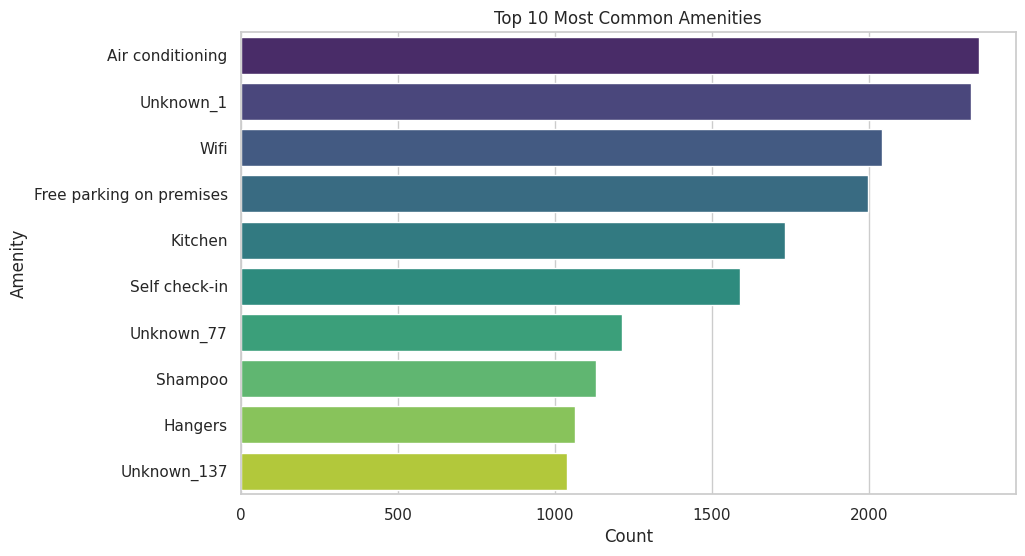

In [33]:
# Count each amenity across all listings
amenity_counts = Airbnb['amenities_list'].explode().value_counts()

# Total number of listings
total_listings = len(Airbnb)

# Top 10 amenities with percentage
top_10_amenities = pd.DataFrame({
    'count': amenity_counts.head(10),
    'percentage': (amenity_counts.head(10)/total_listings*100).round(2)
})

print(top_10_amenities)

# Prepare data
top_10_amenities = Airbnb['amenities_list'].explode().value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_amenities.values, y=top_10_amenities.index, palette='viridis')
plt.title('Top 10 Most Common Amenities')
plt.xlabel('Count')
plt.ylabel('Amenity')
plt.show()

**Outcome:** Dataset enriched with 20+ new features (price metrics, amenities, flags, categories, temporal, spatial).

**Currency Conversion**

- Convert USD prices → SAR.

- Update all price-related columns with _SAR suffix.

**Purpose:** Standardize pricing for comparability.

In [34]:
# Currency Conversion

usd_to_sar = 3.75

# Safely convert prices to SAR, handle missing values
Airbnb['total_price_SAR'] = Airbnb['total_price'].apply(lambda x: round(x*usd_to_sar, 2) if pd.notnull(x) else np.nan)
Airbnb['base_rate_per_night_SAR'] = Airbnb['base_rate_per_night'].apply(lambda x: round(x*usd_to_sar, 2) if pd.notnull(x) else np.nan)
Airbnb['final_price_per_night_SAR'] = Airbnb['final_price_per_night'].apply(lambda x: round(x*usd_to_sar, 2) if pd.notnull(x) else np.nan)

# Add currency column
Airbnb['currency'] = 'SAR'

**Outcome:** All monetary values normalized to SAR

**Outliers Handling**

- Cap/floor extreme values using IQR method.

- Apply feature scaling after capping.

**Purpose:** Reduce effect of extreme outliers on modeling.

In [35]:
# Outliers Handling (IQR method)

def cap_outliers_iqr(df, col, factor=1.5):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - factor*IQR, Q3 + factor*IQR
    df[col] = df[col].clip(lower, upper)
    return df

Airbnb = cap_outliers_iqr(Airbnb, 'final_price_per_night')
scaler = StandardScaler()
Airbnb[['scaled_final_price_per_night','scaled_final_price_per_night_SAR']] = scaler.fit_transform(
    Airbnb[['final_price_per_night','final_price_per_night_SAR']]
)

**Outcome:** Outliers capped; scaled price features created.

**Final Check & Export**

- Review dataset info after cleaning.

- Summarize engineered features.

- Save cleaned dataset for Tableau.

**Purpose:** Ensure dataset integrity and readiness for analysis/visualization.

In [36]:
# Convert list columns to safe string representation
list_cols = ['amenities_list']
for col in list_cols:
    if col in Airbnb.columns:
        Airbnb[col] = Airbnb[col].apply(lambda x: ';'.join(x) if isinstance(x, list) else '')

# Ensure long text columns are converted to strings
text_cols = ['address_unified', 'city_unified', 'district', 'property_type']
for col in text_cols:
    if col in Airbnb.columns:
        Airbnb[col] = Airbnb[col].astype(str)

# Export CSV safely for Tableau
export_path = "airbnb_clean_for_tableau.csv"
Airbnb.to_csv(
    export_path,
    index=False,                 # Do not save row index
    sep=',',                     # Column separator
    quoting=csv.QUOTE_ALL,       # Quote all text fields
    encoding='utf-8-sig'         # Ensure proper support for Arabic text
)

print(f"File successfully exported to: {export_path}")

# Final Check & Summary
def summarize_dataset(df, numeric_cols, categorical_cols, export_path=None):
    print("\n=== Cleaned Dataset Info ===")
    df.info()

    print("\n=== Numeric Features Summary ===")
    for col in numeric_cols:
        if col in df.columns:
            print(f"\n{col} stats:")
            print(df[col].describe())
        else:
            print(f"\n{col} column does NOT exist.")

    print("\n=== Categorical Features Summary ===")
    for col in categorical_cols:
        if col in df.columns:
            print(f"\n{col} value counts (including NA):")
            print(df[col].value_counts(dropna=False))
        else:
            print(f"\n{col} column does NOT exist.")

    # Export cleaned dataset again if needed
    if export_path:
        df.to_csv(export_path, index=False)
        print(f"\nClean dataset saved to {export_path}!")

# Define numeric and categorical columns
numeric_cols = ["stay_duration","total_price","base_rate_total","airbnb_fee",
                "weekly_discount","base_rate_per_night","final_price_per_night",
                "amenities_count","amenities_per_person","total_price_SAR",
                "base_rate_per_night_SAR","final_price_per_night_SAR",
                "reviews_per_person","price_per_person","rating_scaled"]

categorical_cols = ["luxury_flag","amenities_category","city_unified","district","isSuperhost"]

# Call the summary function
summarize_dataset(Airbnb, numeric_cols, categorical_cols, export_path)

File successfully exported to: airbnb_clean_for_tableau.csv

=== Cleaned Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Columns: 209 entries, property_id to scaled_final_price_per_night_SAR
dtypes: UInt32(1), bool(4), boolean(1), category(3), datetime64[ns](2), float64(30), int32(1), int64(151), object(15), period[M](1)
memory usage: 3.6+ MB

=== Numeric Features Summary ===

stay_duration stats:
count    2360.000000
mean       27.881356
std        21.355574
min         1.000000
25%        10.000000
50%        24.000000
75%        44.000000
max        88.000000
Name: stay_duration, dtype: float64

total_price stats:
count    1280.000000
mean      781.530469
std       531.006448
min        40.000000
25%       363.750000
50%       711.500000
75%      1073.500000
max      3716.000000
Name: total_price, dtype: float64

base_rate_total stats:
count    2360.000000
mean      421.426695
std       560.060432
min         0.000000
25%         0.000000
5

**Outcome:** Clean dataset verified and exported.


# **Analysis**

**Relationships Between Numerical Features**
**Steps:**
- Scatter plots with regression lines: Price vs numeric features
- Correlation heatmap
- Pairplot for pairwise relationships
- Compute correlation with final price



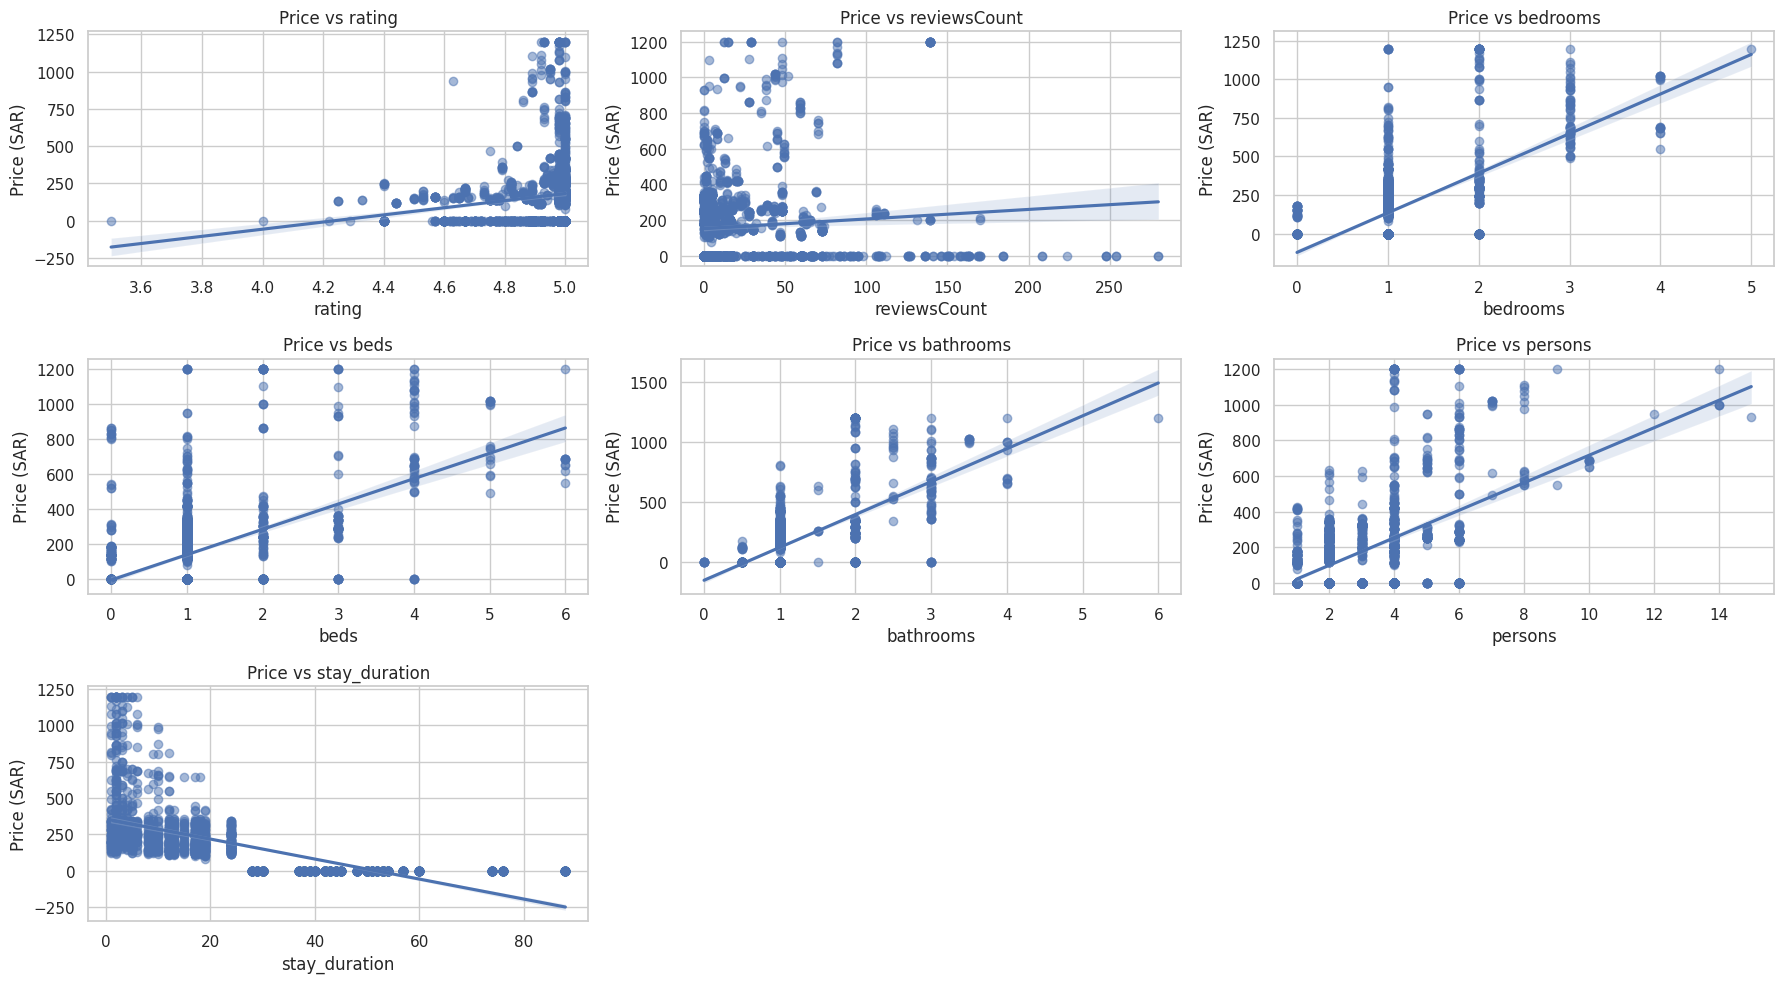

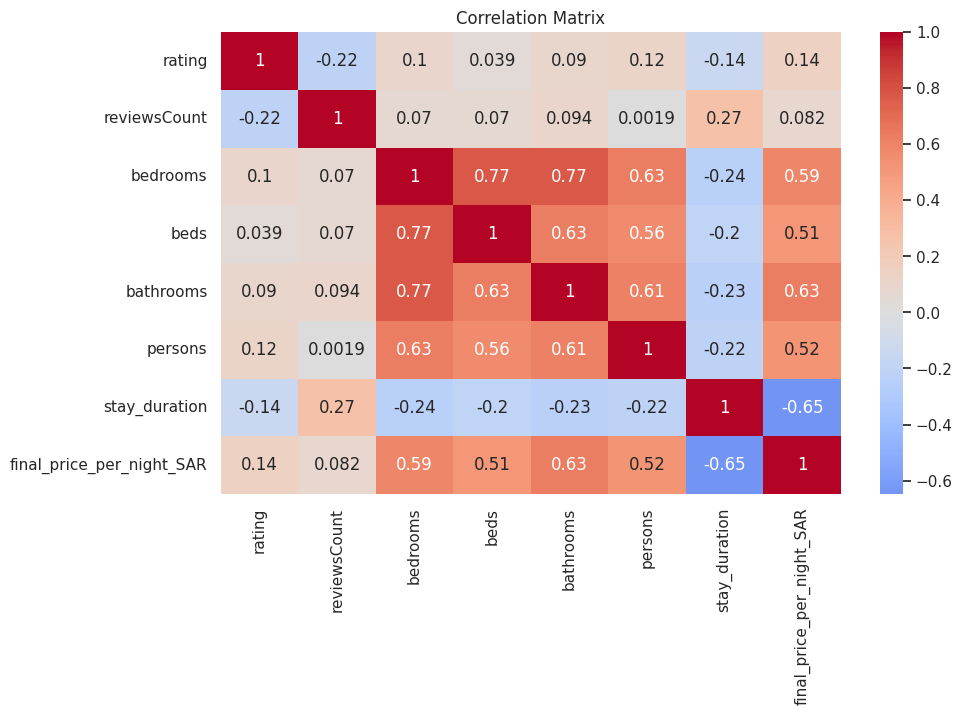

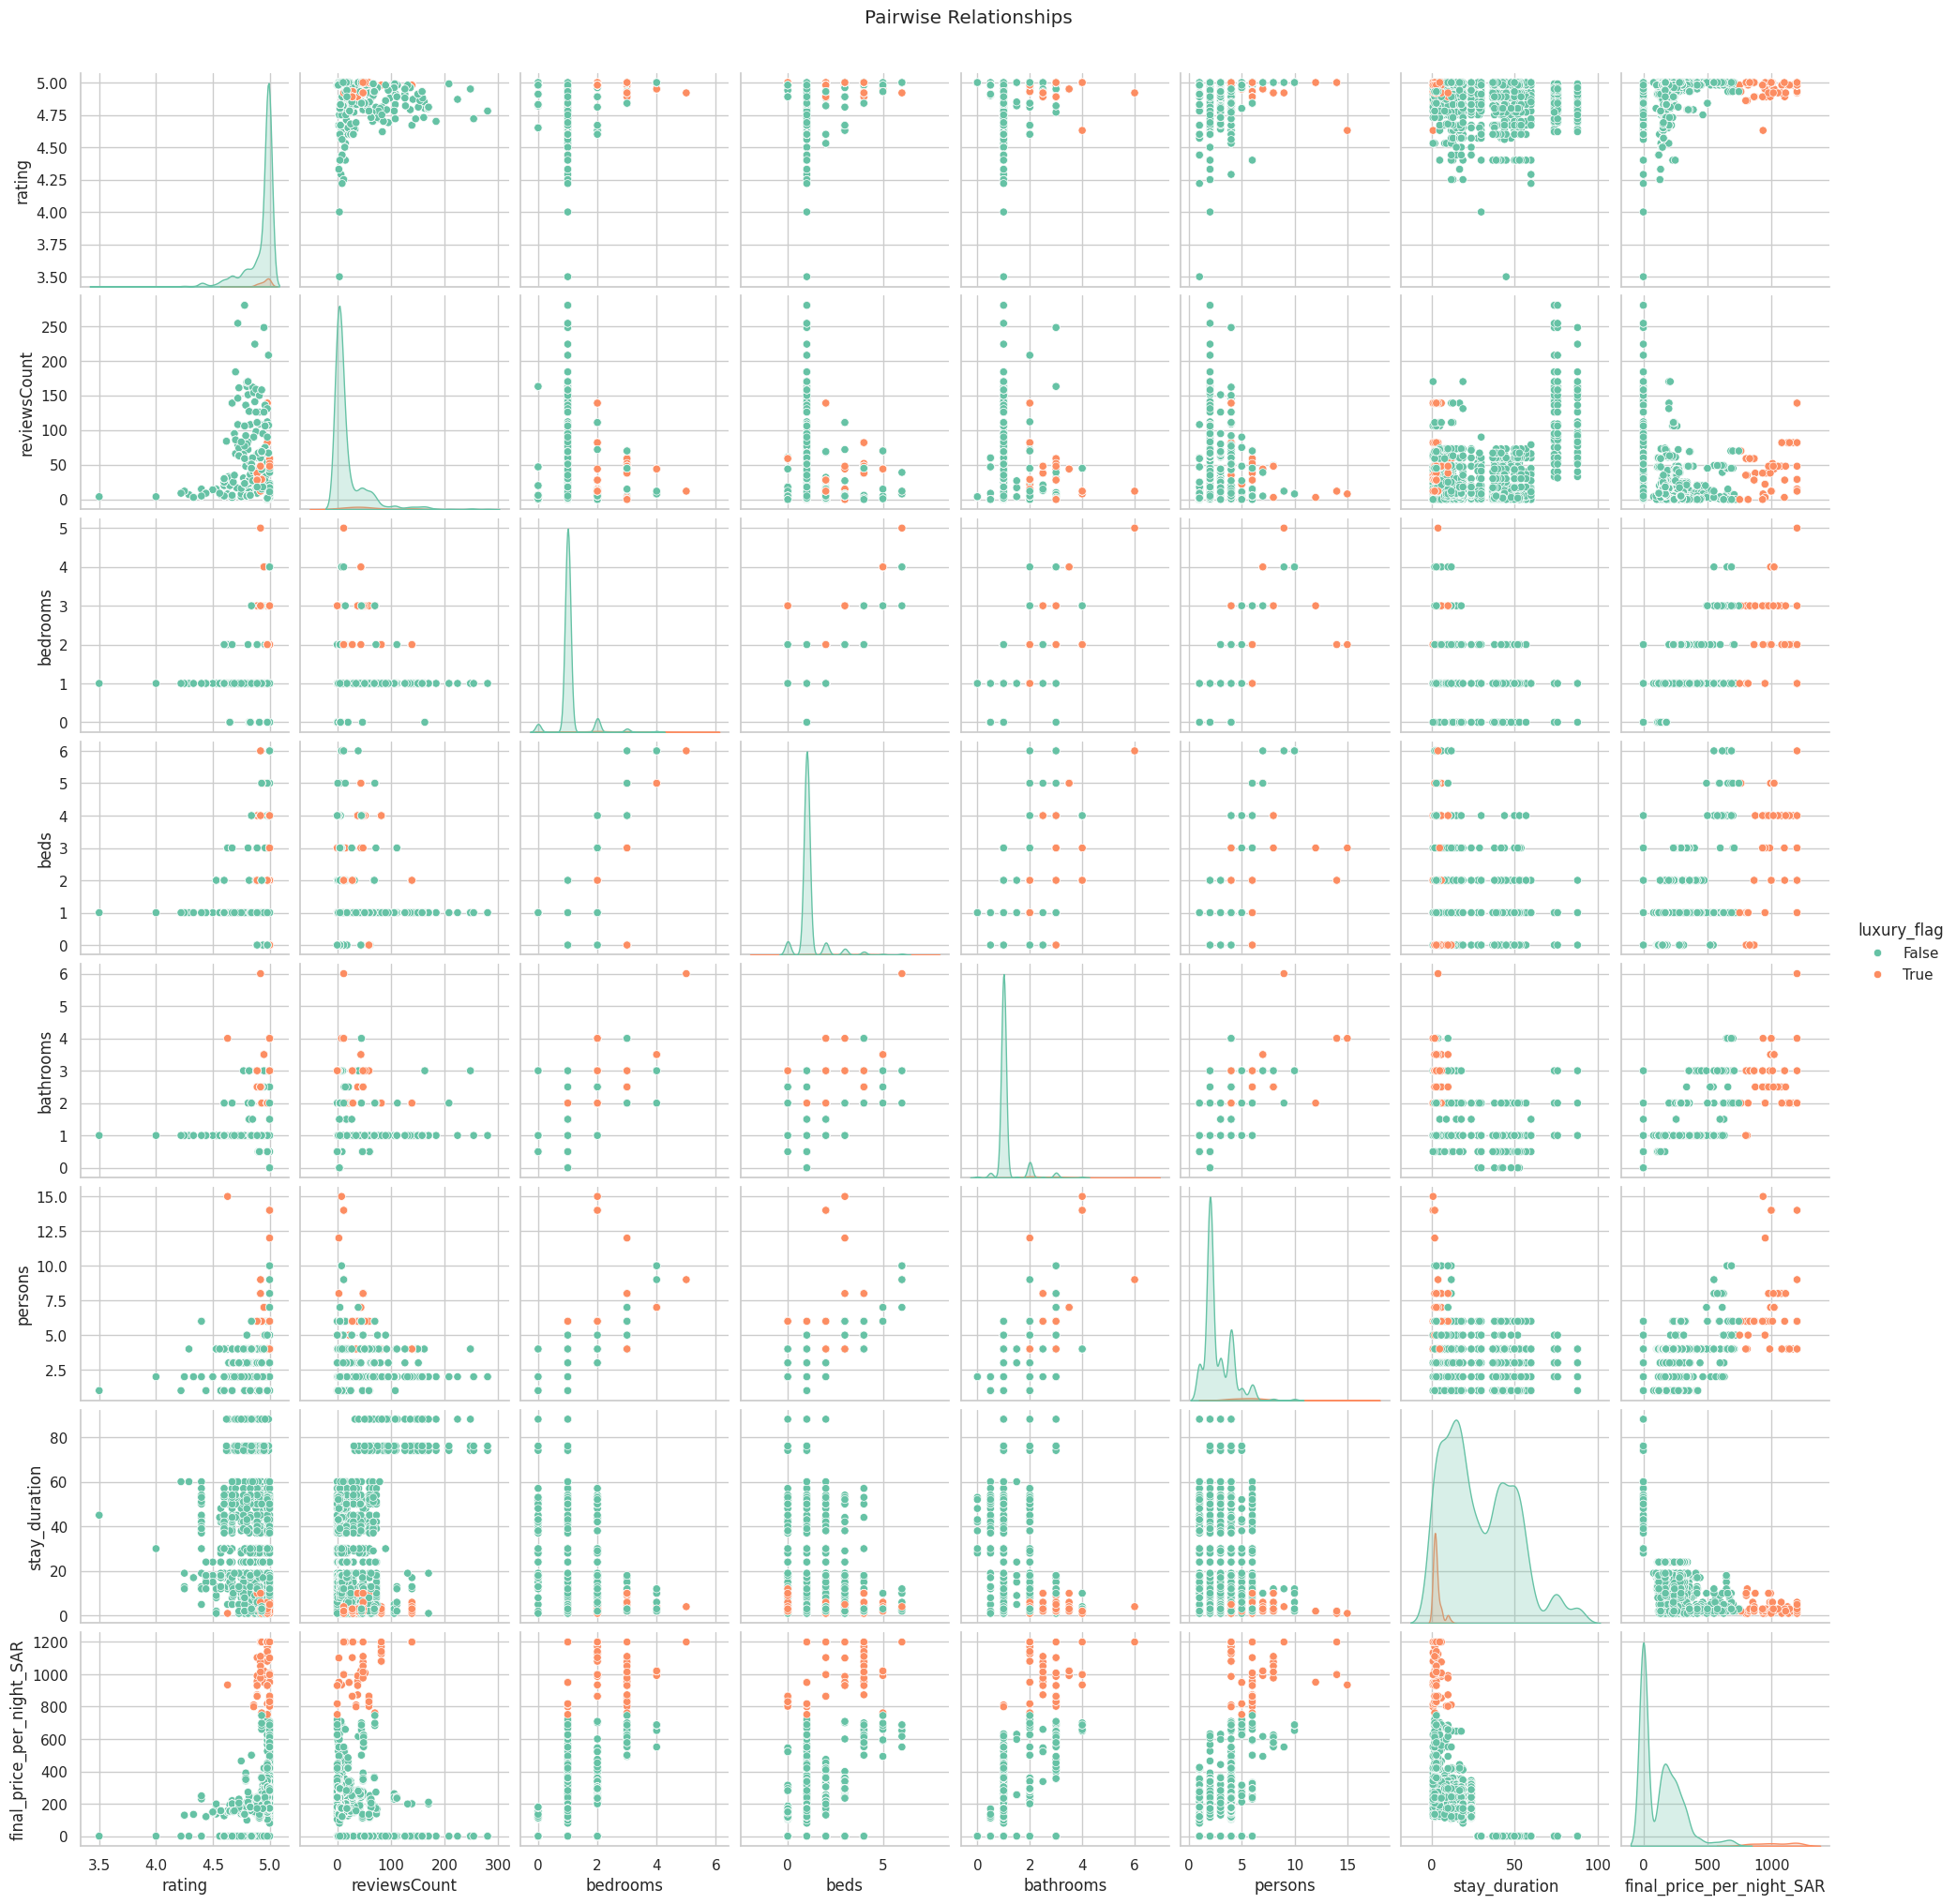

Correlation with Final Price:


final_price_per_night_SAR    1.000000
bathrooms                    0.629801
bedrooms                     0.587028
persons                      0.523749
beds                         0.505228
rating                       0.136980
reviewsCount                 0.082369
stay_duration               -0.648619
Name: final_price_per_night_SAR, dtype: float64

In [37]:
# Numerical Features Analysis

numeric_features = ['rating', 'reviewsCount', 'bedrooms', 'beds', 'bathrooms', 'persons', 'stay_duration']

# Scatter plots with regression line
plt.figure(figsize=(18,10))
for i, col in enumerate(numeric_features):
    plt.subplot(3,3,i+1)
    sns.regplot(data=Airbnb, x=col, y='final_price_per_night_SAR', scatter_kws={'alpha':0.5})
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price (SAR)')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(Airbnb[numeric_features + ['final_price_per_night_SAR']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

# Pairplot (with hue for luxury_flag if exists)
pairplot_cols = numeric_features + ['final_price_per_night_SAR']
if 'luxury_flag' in Airbnb.columns:
    sns.pairplot(Airbnb[pairplot_cols + ['luxury_flag']], hue='luxury_flag', diag_kind='kde', palette='Set2')
else:
    sns.pairplot(Airbnb[pairplot_cols], diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# Correlation with target
corr_price = Airbnb[numeric_features + ['final_price_per_night_SAR']].corr()['final_price_per_night_SAR'].sort_values(ascending=False)
print("Correlation with Final Price:")
display(corr_price)

**Outcome:** Price positively correlates with bedrooms, beds, bathrooms, stay_duration; weak correlation with rating, reviewsCount, and persons.

**Categorical Features Analysis**

**Purpose:** Understand impact of categorical variables on price.

**Steps:**
- Countplots for distribution
- Violin plots for price distribution
- Mean price per category

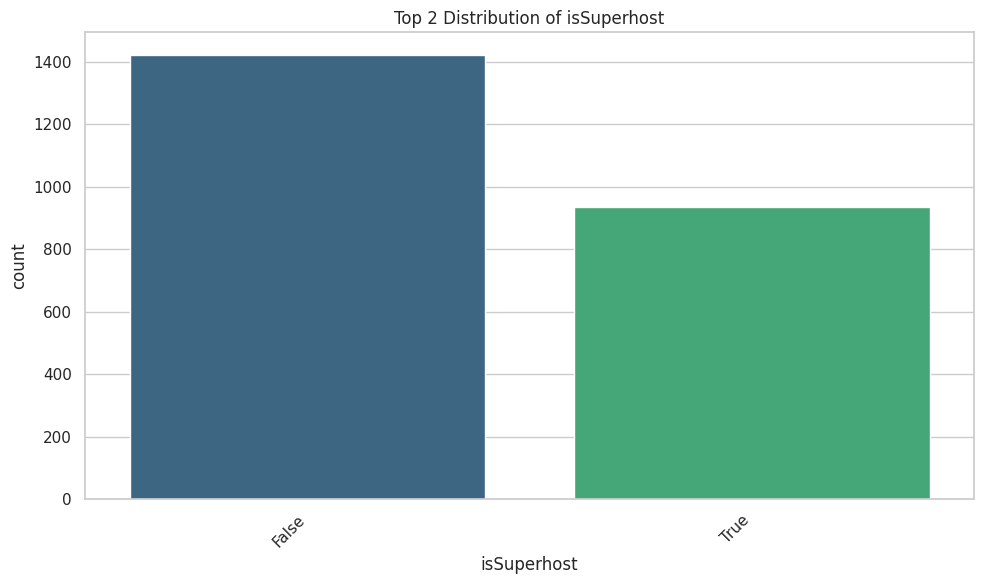

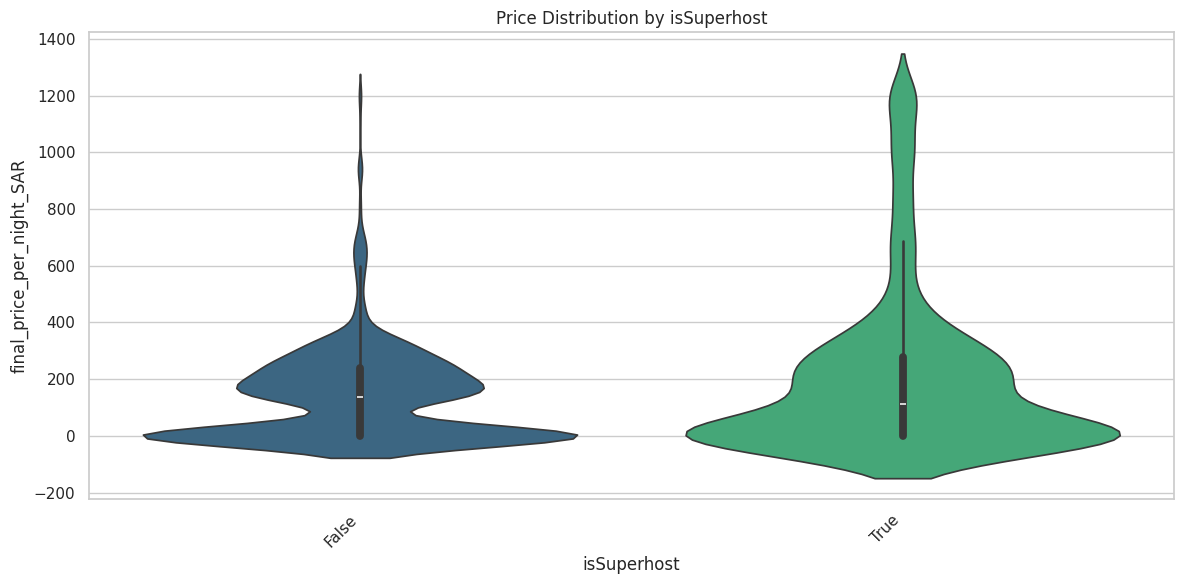

Average Price per isSuperhost:


isSuperhost
True     201.635870
False    139.121427
Name: final_price_per_night_SAR, dtype: float64

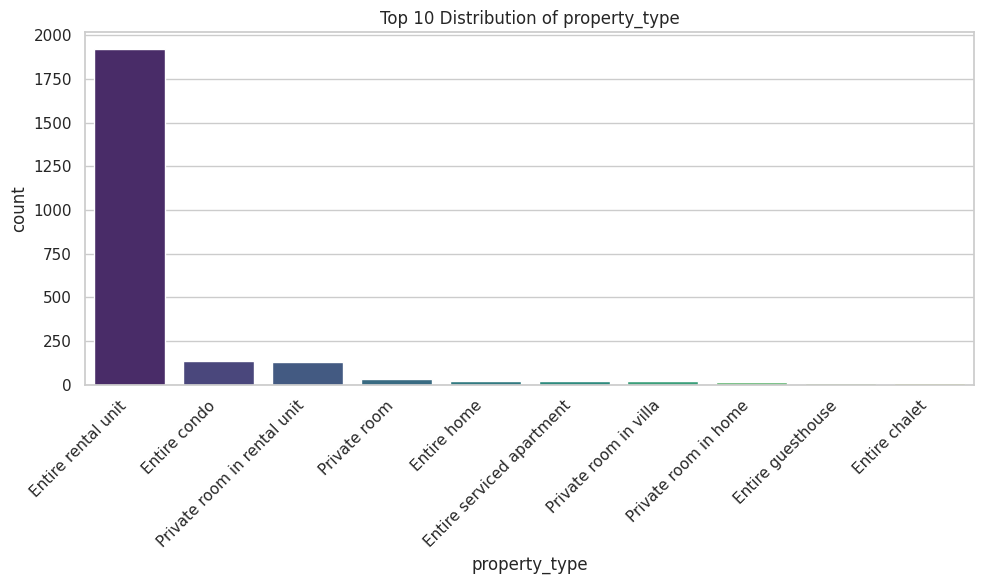

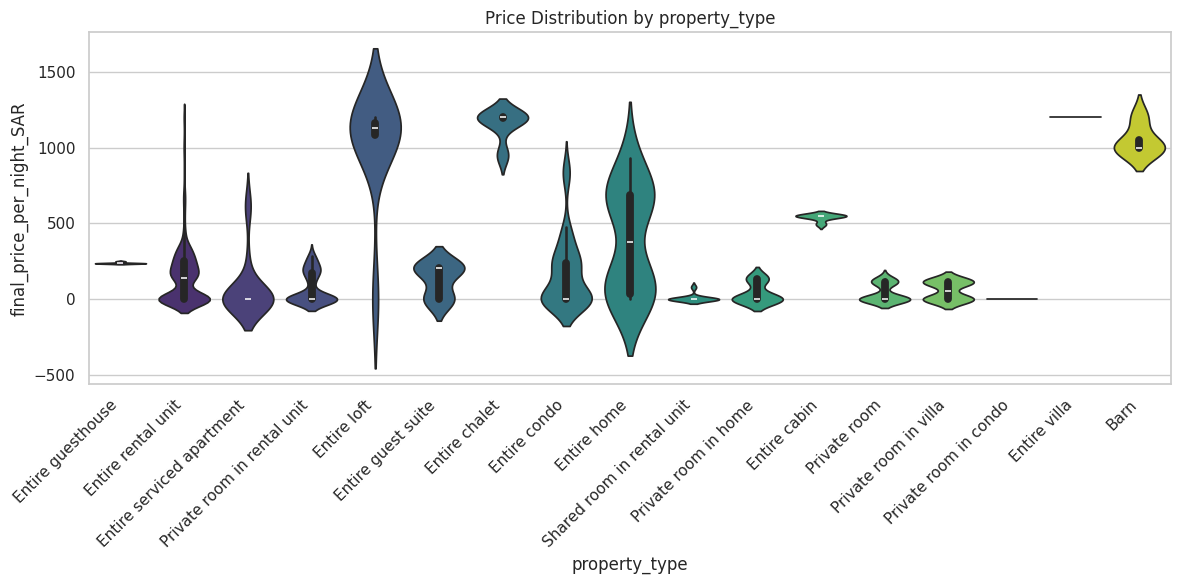

Average Price per property_type:


property_type
Entire villa          1198.890000
Entire chalet         1153.440000
Barn                  1048.787500
Entire loft           1020.528000
Entire cabin           540.628333
Entire home            391.631818
Entire guesthouse      238.636667
Entire condo           177.185182
Entire rental unit     158.461093
Entire guest suite     129.651250
Name: final_price_per_night_SAR, dtype: float64

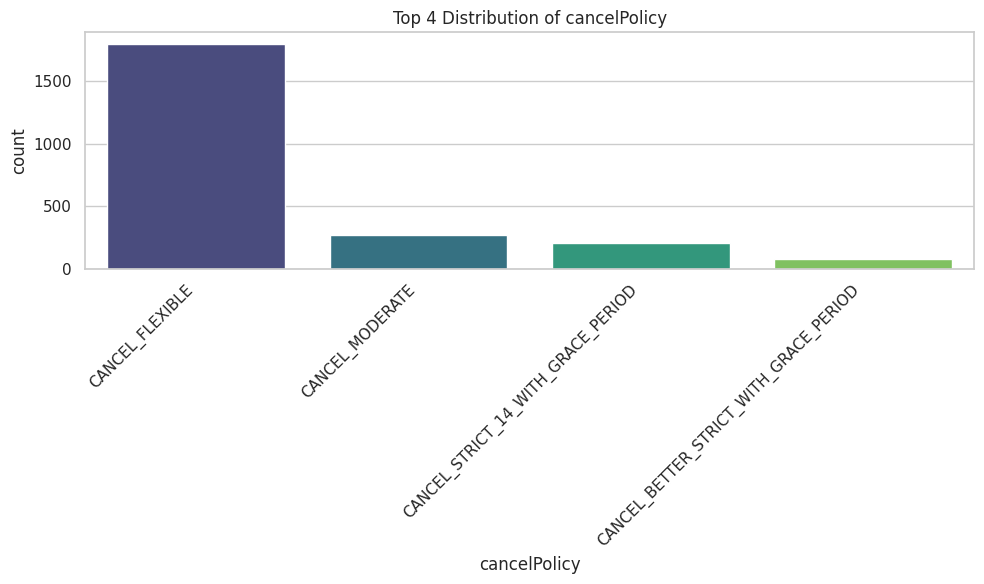

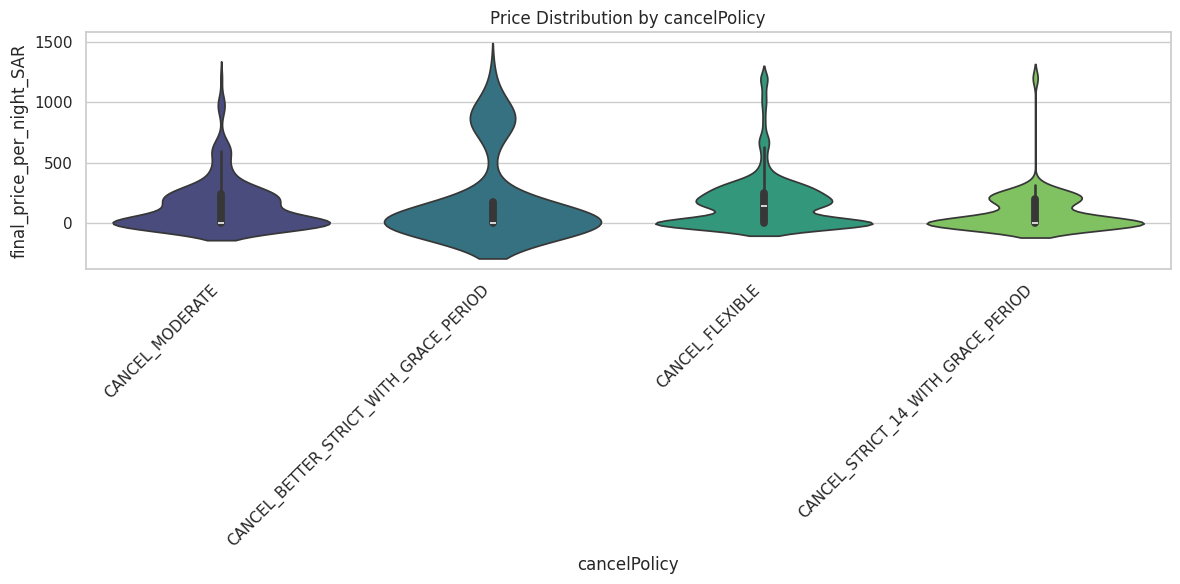

Average Price per cancelPolicy:


cancelPolicy
CANCEL_BETTER_STRICT_WITH_GRACE_PERIOD    190.091585
CANCEL_FLEXIBLE                           173.204529
CANCEL_MODERATE                           151.335328
CANCEL_STRICT_14_WITH_GRACE_PERIOD         90.655885
Name: final_price_per_night_SAR, dtype: float64

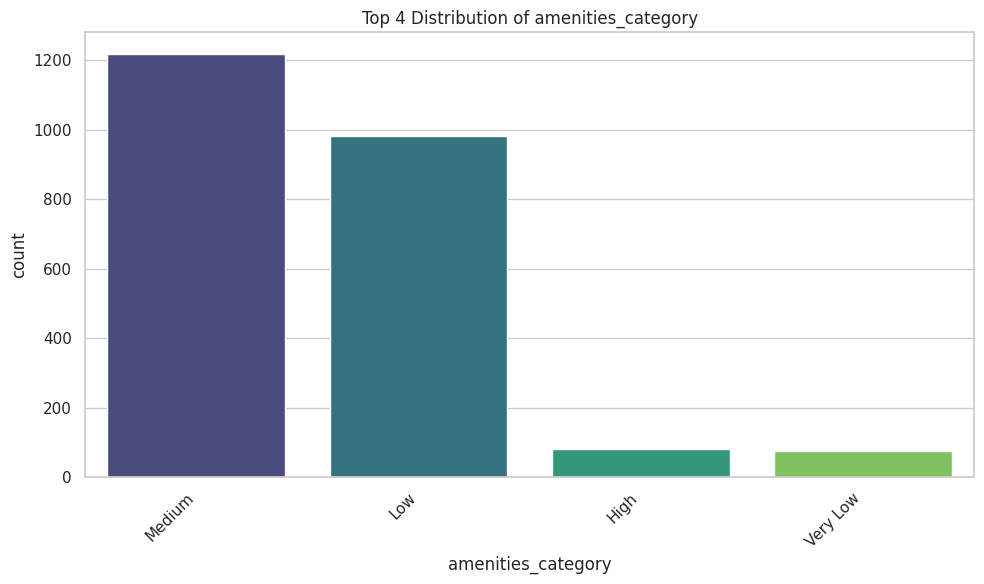

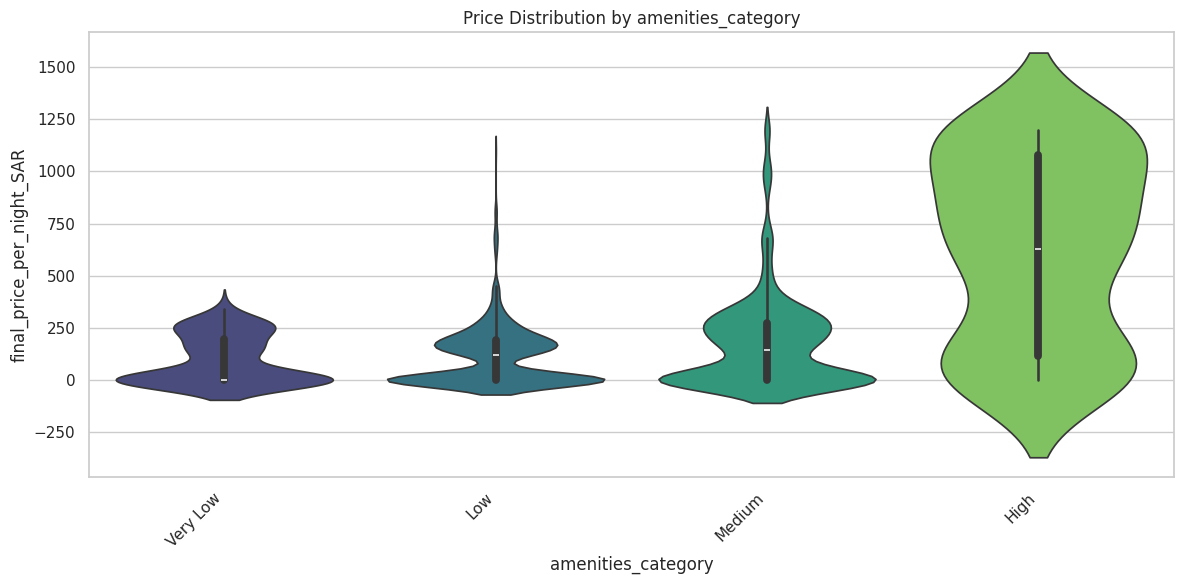

Average Price per amenities_category:


amenities_category
High        624.437407
Medium      179.975893
Low         111.390855
Very Low     95.465395
Name: final_price_per_night_SAR, dtype: float64

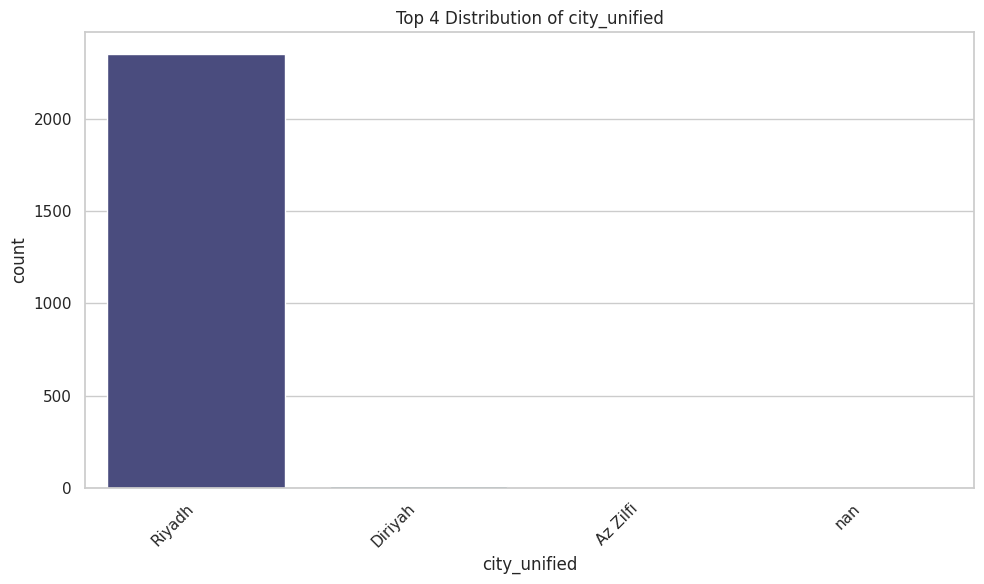

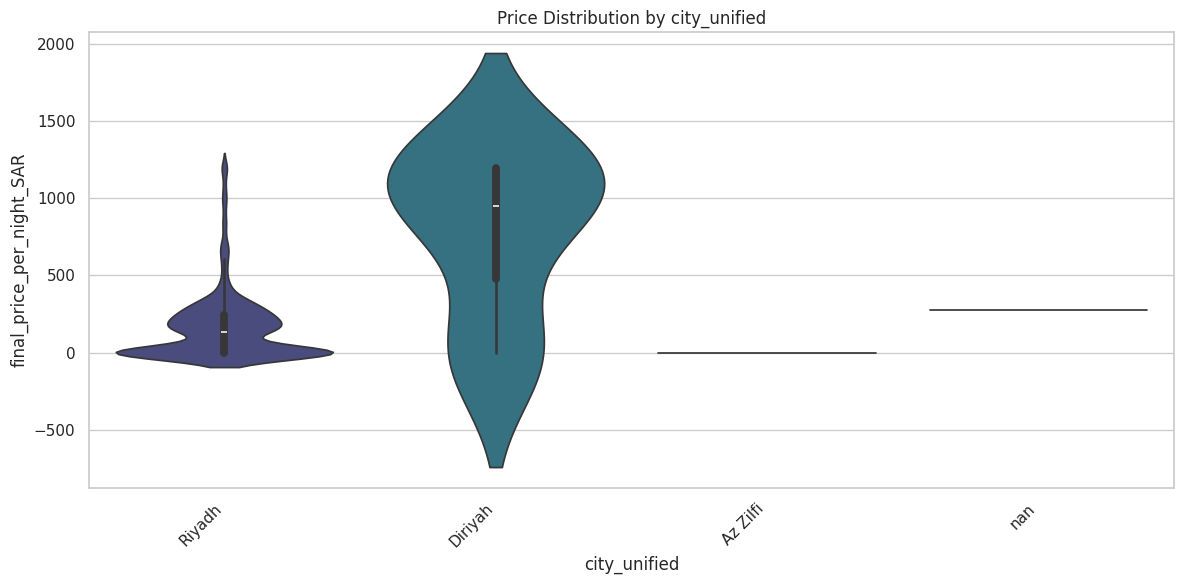

Average Price per city_unified:


city_unified
Diriyah     785.148571
nan         278.490000
Riyadh      162.113173
Az Zilfi      0.000000
Name: final_price_per_night_SAR, dtype: float64

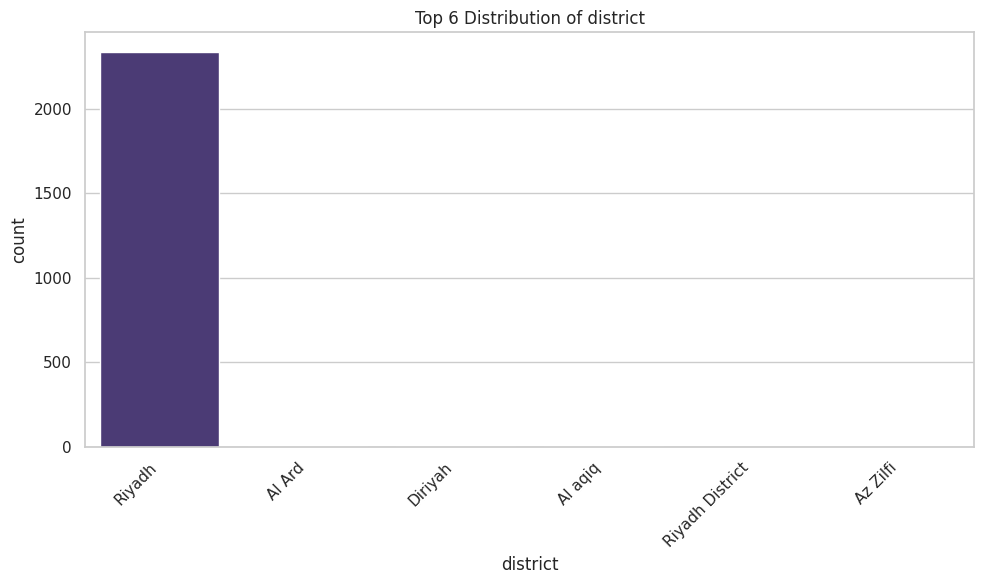

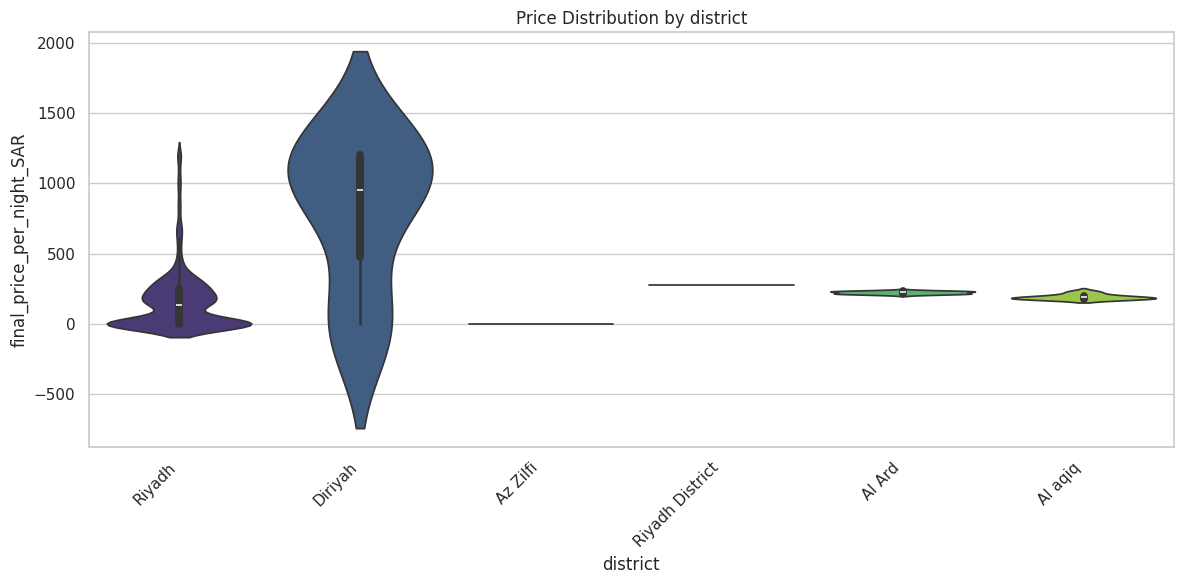

Average Price per district:


district
Diriyah            785.148571
Riyadh District    278.490000
Al Ard             223.418750
Al aqiq            192.412857
Riyadh             161.812427
Az Zilfi             0.000000
Name: final_price_per_night_SAR, dtype: float64

In [38]:
# Categorical Features Analysis

categorical_features = ['isSuperhost', 'property_type', 'cancelPolicy', 'amenities_category', 'city_unified', 'district']

for col in categorical_features:
    # If too many unique values, show top 10
    counts = Airbnb[col].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.countplot(data=Airbnb, x=col, order=counts.index, palette='viridis')
    plt.title(f'Top {len(counts)} Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12,6))
    sns.violinplot(data=Airbnb, x=col, y='final_price_per_night_SAR', palette='viridis')
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    mean_price = Airbnb.groupby(col)['final_price_per_night_SAR'].mean().sort_values(ascending=False)
    print(f"Average Price per {col}:")
    display(mean_price.head(10))  # show top 10 only

**Outcome:** Property type, cancellation policy, and location significantly affect price; Superhosts tend to have higher prices.


**Geospatial Analysis**

**Purpose:** Analyze spatial price patterns in Riyadh.

**Steps:**
- Scatter plot with price color coding
- Weighted KDE heatmap using price
- Interactive map with hover details

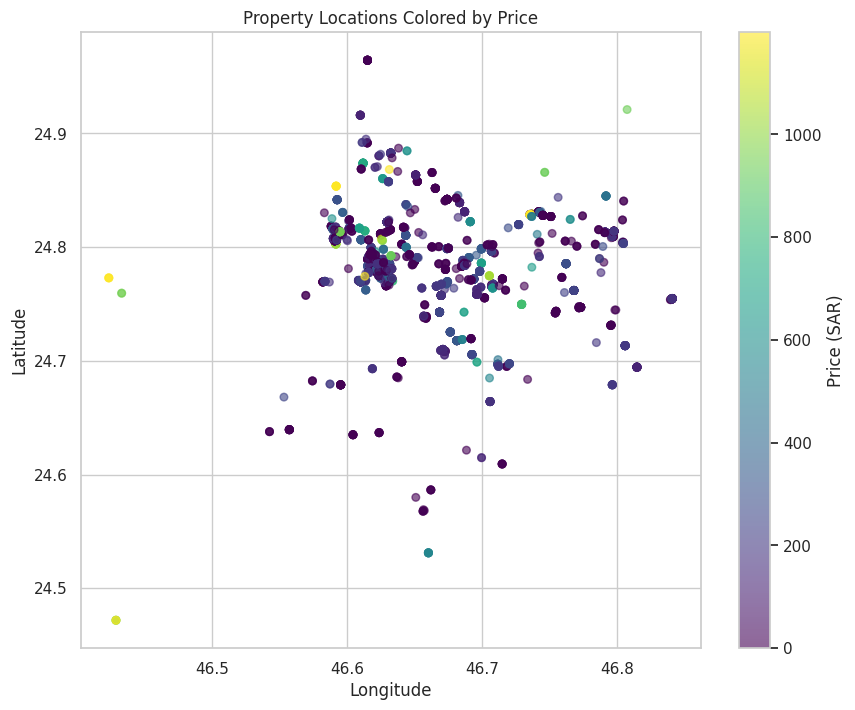

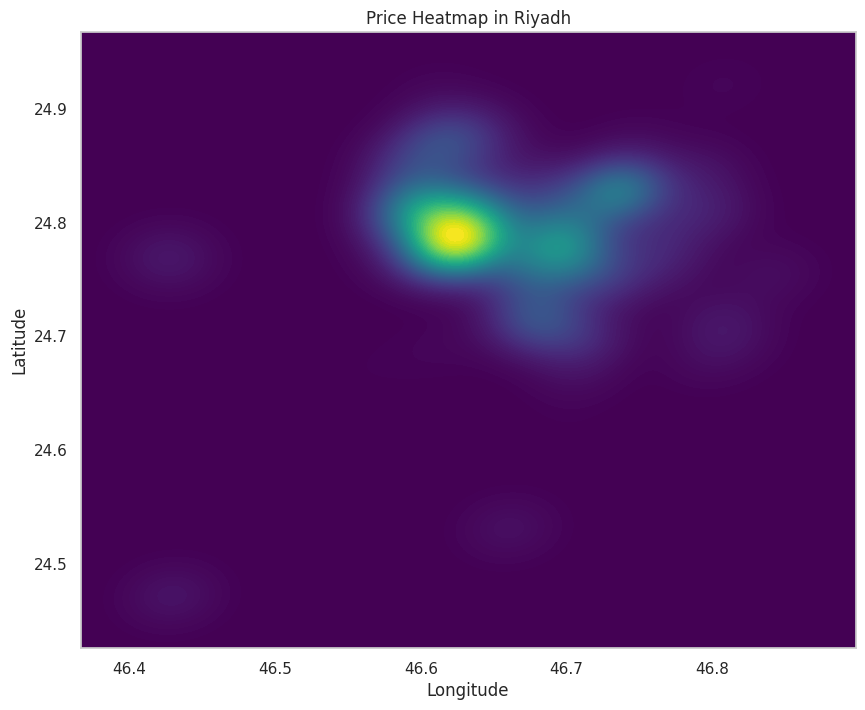

In [39]:
# Geospatial Analysis

# Scatter plot: Locations colored by price
plt.figure(figsize=(10,8))
sc = plt.scatter(Airbnb['lng'], Airbnb['lat'], c=Airbnb['final_price_per_night_SAR'], cmap='viridis', alpha=0.6, s=30)
plt.colorbar(sc, label='Price (SAR)')
plt.title("Property Locations Colored by Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Weighted KDE heatmap
Airbnb_kde = Airbnb[Airbnb['final_price_per_night_SAR'] > 0]
plt.figure(figsize=(10,8))
sns.kdeplot(
    x=Airbnb_kde['lng'], y=Airbnb_kde['lat'],
    weights=Airbnb_kde['final_price_per_night_SAR'],
    cmap='viridis', fill=True, thresh=0, levels=100
)
plt.title("Price Heatmap in Riyadh")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Interactive map with Plotly
fig = px.scatter_mapbox(
    Airbnb,
    lat="lat", lon="lng",
    color="final_price_per_night_SAR",
    hover_name="name",
    hover_data=["property_type", "bedrooms", "beds", "bathrooms", "rating"],
    zoom=10, height=600,
    color_continuous_scale="Viridis"
)
fig.update_layout(mapbox_style="open-street-map", title="Airbnb Property Prices Interactive Map")
fig.show()

**Outcome:** Prices vary across districts; interactive map highlights hotspots.

**Amenities Analysis**

**Purpose:** Assess how amenities influence pricing.

**Steps:**
- Scatter plots: amenities_count vs price
- Scatter plots: amenities_per_person vs price

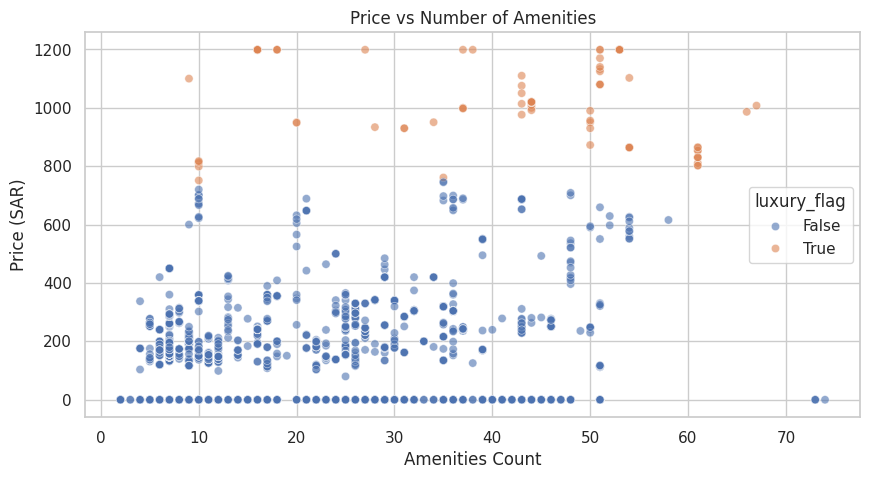

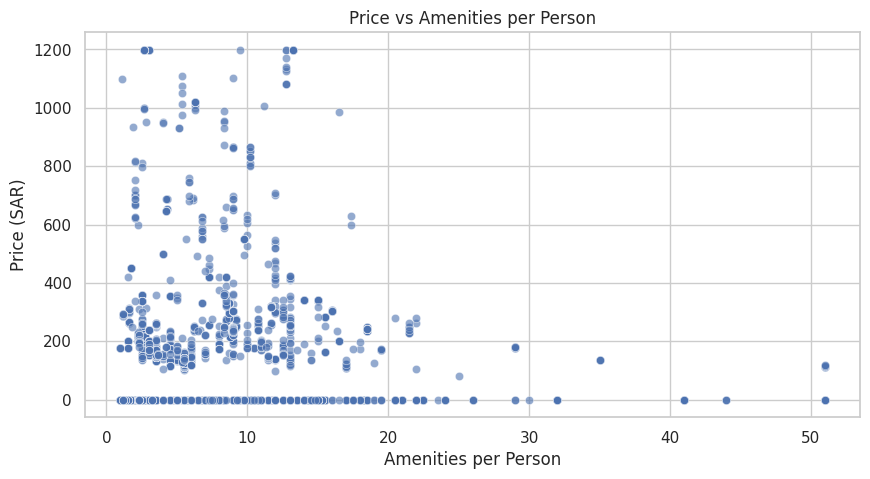

In [40]:
# Amenities Feature Analysis

if 'amenities_count' in Airbnb.columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=Airbnb, x='amenities_count', y='final_price_per_night_SAR', hue='luxury_flag' if 'luxury_flag' in Airbnb.columns else None, alpha=0.6)
    plt.title("Price vs Number of Amenities")
    plt.xlabel("Amenities Count")
    plt.ylabel("Price (SAR)")
    plt.show()

if 'amenities_per_person' in Airbnb.columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=Airbnb, x='amenities_per_person', y='final_price_per_night_SAR', alpha=0.6)
    plt.title("Price vs Amenities per Person")
    plt.xlabel("Amenities per Person")
    plt.ylabel("Price (SAR)")
    plt.show()

**Outcome:** More amenities slightly increase price.

**Time Series Analysis**

**Purpose:** Identify temporal patterns and seasonality in pricing.

**Steps:**
- Average price per month
- Average price per weekday
- Heatmap month vs weekday


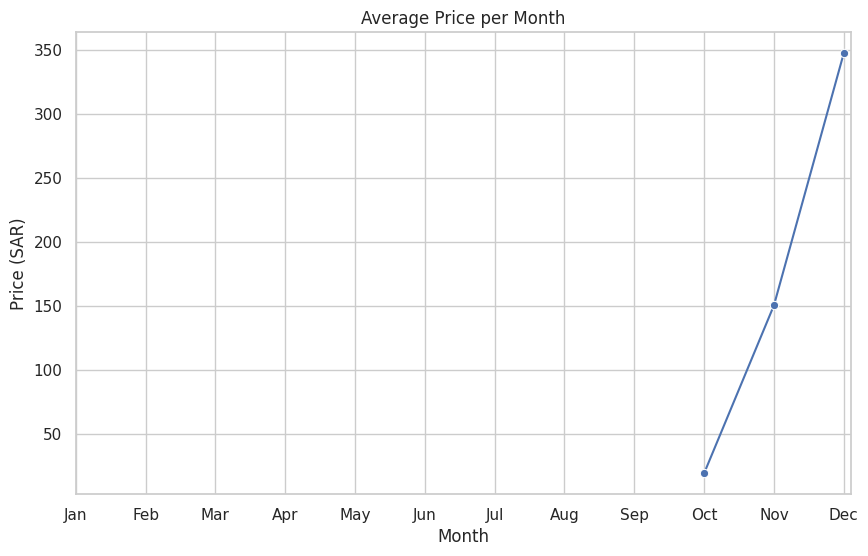

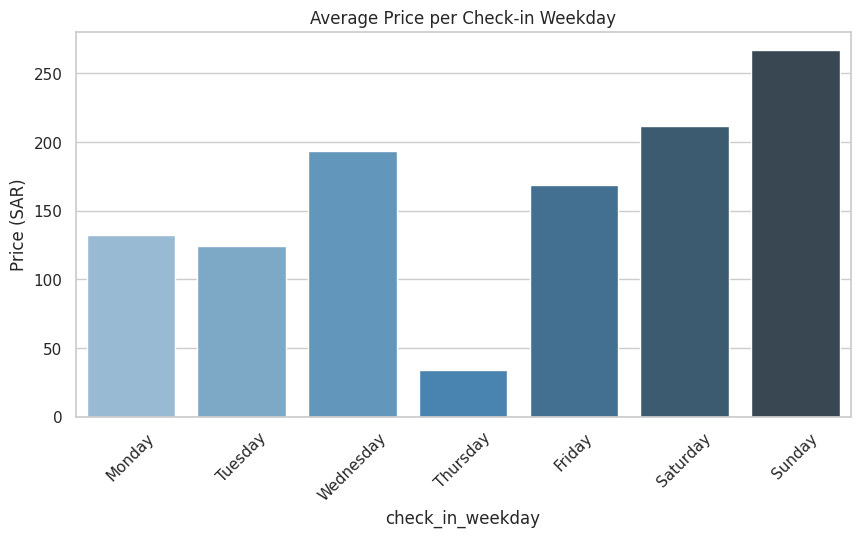

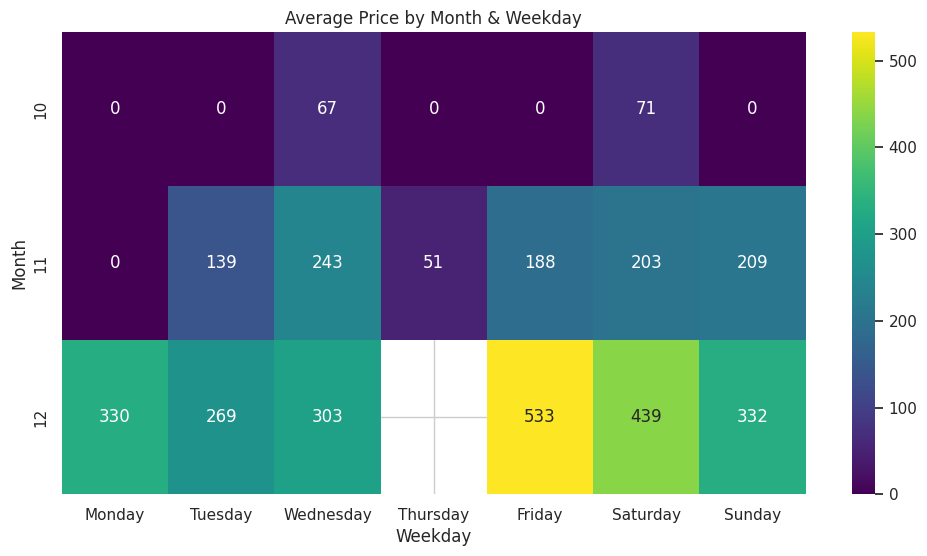

In [41]:
# Time Series Analysis

Airbnb['check_in_month'] = Airbnb['check_in'].dt.month
Airbnb['check_in_weekday'] = Airbnb['check_in'].dt.day_name()

# Average price per month
avg_price_month = Airbnb.groupby('check_in_month')['final_price_per_night_SAR'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_price_month, x='check_in_month', y='final_price_per_night_SAR', marker='o')
plt.title("Average Price per Month")
plt.xlabel("Month")
plt.ylabel("Price (SAR)")
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()

# Average price per weekday
avg_price_weekday = Airbnb.groupby('check_in_weekday')['final_price_per_night_SAR'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_weekday.index, y=avg_price_weekday.values, palette='Blues_d')
plt.title("Average Price per Check-in Weekday")
plt.ylabel("Price (SAR)")
plt.xticks(rotation=45)
plt.show()

# Heatmap: Month vs Weekday
price_matrix = Airbnb.groupby(['check_in_month','check_in_weekday'])['final_price_per_night_SAR'].mean().unstack()
price_matrix = price_matrix[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
plt.figure(figsize=(12,6))
sns.heatmap(price_matrix, annot=True, fmt=".0f", cmap='viridis')
plt.title("Average Price by Month & Weekday")
plt.xlabel("Weekday")
plt.ylabel("Month")
plt.show()

**Outcome:** Short-term stays dominate; seasonal trends inform pricing strategies.

**Clustering Analysis**

**Purpose:** Identify distinct groups of properties for segmentation.

**Steps:**
- KMeans clustering on numeric features
- PCA for 2D visualization
- Cluster heatmap for characteristics


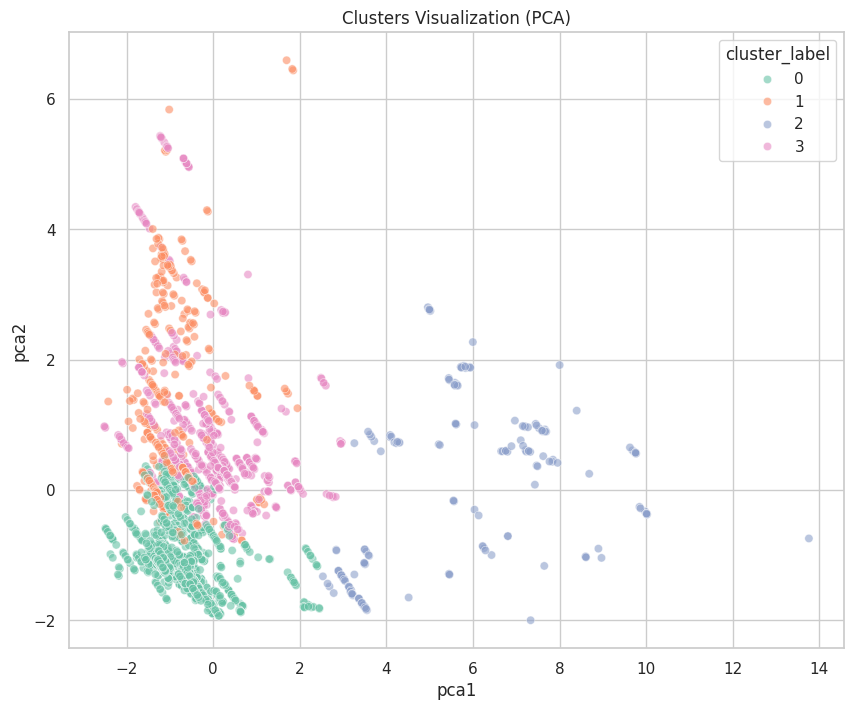

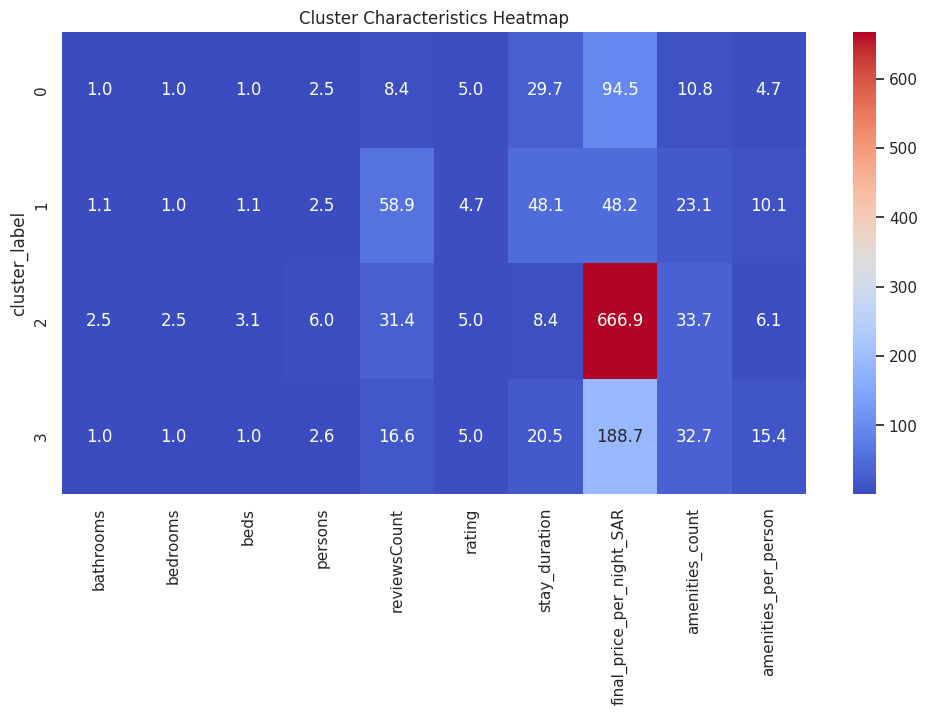

In [42]:
# Clustering Analysis

features_for_clustering = [
    'bathrooms', 'bedrooms', 'beds', 'persons', 'reviewsCount',
    'rating', 'stay_duration', 'final_price_per_night_SAR',
    'amenities_count', 'amenities_per_person'
]

Airbnb[features_for_clustering] = Airbnb[features_for_clustering].fillna(Airbnb[features_for_clustering].median())
scaler = StandardScaler()
scaled_features = scaler.fit_transform(Airbnb[features_for_clustering])

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
Airbnb['cluster_label'] = kmeans.fit_predict(scaled_features)

# PCA for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
Airbnb['pca1'] = pca_features[:,0]
Airbnb['pca2'] = pca_features[:,1]

plt.figure(figsize=(10,8))
sns.scatterplot(data=Airbnb, x='pca1', y='pca2', hue='cluster_label', palette='Set2', alpha=0.6)
plt.title("Clusters Visualization (PCA)")
plt.show()

# Cluster heatmap
plt.figure(figsize=(12,6))
sns.heatmap(Airbnb.groupby('cluster_label')[features_for_clustering].mean(), annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Cluster Characteristics Heatmap")
plt.show()

**Outcome:** Four property clusters identified; guide pricing, marketing, and segmentation.

**Outliers Analysis**

**Purpose:** Detect extreme high-price properties.

 **Steps:**
- Identify top 1% high-priced properties
- Display details for inspection

In [43]:
# Outliers Analysis

# identify top 1% high-priced properties
high_price_threshold = Airbnb['final_price_per_night_SAR'].quantile(0.99)
outliers = Airbnb[Airbnb['final_price_per_night_SAR'] > high_price_threshold]

print(f"Number of high-price outliers: {len(outliers)}")
display(outliers[['name','final_price_per_night_SAR','bedrooms','beds','bathrooms','district']])

Number of high-price outliers: 24


name  \
63              Swimming pool Cinma Penthouse selflogin   
64              Swimming pool Cinma Penthouse selflogin   
110   Chalet B with modern design pool and outdoor s...   
111   Chalet B with modern design pool and outdoor s...   
112   Chalet B with modern design pool and outdoor s...   
1972           5-bedroom villa 2 living rooms 2 parking   
2146       Executive Two by Parallel (Instant check-in)   
2149       Executive Two by Parallel (Instant check-in)   
2150       Executive Two by Parallel (Instant check-in)   
2151       Executive Two by Parallel (Instant check-in)   
2244                           Tuwaiq View Hotel Resort   
2253                    Penthouse swimmingpool & Cinema   
2254                    Penthouse swimmingpool & Cinema   
2255                    Penthouse swimmingpool & Cinema   
2256                    Penthouse swimmingpool & Cinema   
2257                    Penthouse swimmingpool & Cinema   
2258                    Penthouse swimmingpool & Cinema   
2259                    Penthouse swimmingpool & Cinema   
2260                    Penthouse swimmingpool & Cinema   
2261                    Penthouse swimmingpool & Cinema   
2262                    Penthouse swimmingpool & Cinema   
2263                    Penthouse swimmingpool & Cinema   
2264                    Penthouse swimmingpool & Cinema   
2328  Billiard garden apartment with private enteran...   

      final_price_per_night_SAR  bedrooms  beds  bathrooms district  
63                      1198.89         2     4        2.0   Riyadh  
64                      1198.89         2     4        2.0   Riyadh  
110                     1198.89         2     3        2.0  Diriyah  
111                     1198.89         2     3        2.0  Diriyah  
112                     1198.89         2     3        2.0  Diriyah  
1972                    1198.89         5     6        6.0   Riyadh  
2146                    1198.89         1     1        2.0   Riyadh  
2149                    1198.89         1     1        2.0   Riyadh  
2150                    1198.89         1     1        2.0   Riyadh  
2151                    1198.89         1     1        2.0   Riyadh  
2244                    1198.89         2     2        4.0   Riyadh  
2253                    1198.89         2     2        2.0   Riyadh  
2254                    1198.89         2     2        2.0   Riyadh  
2255                    1198.89         2     2        2.0   Riyadh  
2256                    1198.89         2     2        2.0   Riyadh  
2257                    1198.89         2     2        2.0   Riyadh  
2258                    1198.89         2     2        2.0   Riyadh  
2259                    1198.89         2     2        2.0   Riyadh  
2260                    1198.89         2     2        2.0   Riyadh  
2261                    1198.89         2     2        2.0   Riyadh  
2262                    1198.89         2     2        2.0   Riyadh  
2263                    1198.89         2     2        2.0   Riyadh  
2264                    1198.89         2     2        2.0   Riyadh  
2328                    1198.89         3     3        3.0   Riyadh

**Outcome:** Top 1% high-priced properties detected; may be luxury or anomaly listings.

**Data Analysis Summary & Insights**

**Overview**

- Summarize key findings from the exploratory data analysis (EDA) and advanced analyses.

- Highlight features, patterns, and relationships driving Airbnb prices.

- Provide actionable insights and recommendations for next steps.

**Purpose:** Give a concise summary of all analyses and guide decision-making.
**Outcome:** Key drivers of price identified; insights ready for strategy, segmentation, and predictive modeling.

**Price Correlations**

- Numeric features like bedrooms, beds, and bathrooms positively correlate with price.

- Rating and reviewsCount show weak or unclear correlation.

**Purpose:** Identify numeric factors influencing price.
**Outcome:** Property size is a strong price driver; guest feedback alone is not sufficient for predicting price.

**Categorical Features Impact**

- Property type, cancellation policy, city_unified, and district significantly affect price.

- Certain property types and districts consistently command higher prices.

**Purpose:** Determine how categorical variables influence pricing.
**Outcome:** Location and property characteristics strongly impact pricing strategy.

**Geospatial Insights**

- Prices vary across Riyadh; some districts show higher average prices.

- Scatter plots and heatmaps highlight spatial patterns.

**Purpose:** Understand location-based price differences.
**Outcome:** Useful for location-based pricing strategies and identifying high-value areas.

**Time Series & Stay Patterns**

- Most bookings are short-term.

- Prices show seasonality across months and weekdays.

- Heatmap identifies peak periods.

**Purpose**: Explore temporal patterns and seasonality.
**Outcome:** Short-term stays dominate; seasonal trends inform dynamic pricing strategies.

**Amenities Analysis**

- Amenities count and amenities per person moderately influence price.

- Scatter plots indicate properties with more amenities tend to cost more.

**Purpose:** Assess influence of amenities on pricing.
**Outcome:** Extra amenities can justify higher prices; useful for feature-based pricing.

**Clustering Insights**

- Four property clusters identified via KMeans + PCA:

- Cluster 0: High reviews, long stays

- Cluster 1: Larger, higher price, highest rating, shortest stays

- Cluster 2: Lowest reviews and amenities

- Cluster 3: Moderate characteristics

**Purpose:** Segment properties for targeted strategies.
**Outcome:** Clusters enable tailored marketing, pricing, and competitive analysis.

**Outliers**

- Top 1% high-priced properties detected.

- Outliers can skew analysis and models.

**Purpose**: Detect extreme pricing cases.
**Outcome:** Consider handling outliers separately in modeling and pricing decisions.

**Overall Insights / Next Steps**

- Use clustering to inform segmentation, marketing, and pricing.

- Investigate high-price outliers for potential luxury or anomaly listings.

- Combine EDA insights with predictive modeling (e.g., Random Forest + SHAP) to quantify feature impact.

- Focus on location, property size, and amenities for price optimization strategies.

# **Predictive Modeling**

**Modeling Overview**

- Define targets (final_price_per_night_SAR and stay_duration) and select numeric and categorical features.

- Split dataset into training and testing sets.

- Apply preprocessing: scale numeric features and one-hot encode categorical features.

- Train a Multi-output Random Forest Regressor.

- Evaluate model performance using MAE, RMSE, R².

- Perform hyperparameter tuning with RandomizedSearchCV for best model configuration.

- Perform cross-validation separately for each target to obtain reliable MAE and RMSE scores.

- Convert target series to 2D DataFrame to be compatible with scikit-learn.

**Purpose:**
- Build and tune a predictive model for property price and stay duration prediction.
 - Assess model generalization and performance stability across folds for each target.

In [44]:
# Target & Features

targets = ['final_price_per_night_SAR', 'stay_duration']
numeric_features = [
    'bedrooms', 'bathrooms', 'beds', 'persons', 'reviewsCount',
    'rating', 'amenities_count', 'amenities_per_person'
]
categorical_features = ['isSuperhost', 'property_type', 'district', 'cancelPolicy']

# Prepare Data
df_model = Airbnb.dropna(subset=targets).copy()

# Remove outliers using IQR method per target
for target in targets:
    Q1 = df_model[target].quantile(0.25)
    Q3 = df_model[target].quantile(0.75)
    IQR = Q3 - Q1
    df_model = df_model[(df_model[target] >= Q1 - 1.5*IQR) & (df_model[target] <= Q3 + 1.5*IQR)]

X = df_model[numeric_features + categorical_features].copy()
y = df_model[targets].copy()

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [45]:
# Preprocessing + Pipeline

preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

# Multi-output Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
multi_rf = MultiOutputRegressor(rf)

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', multi_rf)
])

In [46]:
# Hyperparameter Tuning

param_dist = {
    'model__estimator__n_estimators': [100, 200, 500],
    'model__estimator__max_depth': [None, 10, 20, 40],
    'model__estimator__min_samples_split': [2, 5, 10],
    'model__estimator__min_samples_leaf': [1, 2, 4],
    'model__estimator__max_features': ['sqrt', 0.5],
    'model__estimator__bootstrap': [True, False]
}

rs = RandomizedSearchCV(
    pipe, param_distributions=param_dist, n_iter=20, cv=5,
    scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42
)
rs.fit(X_train, y_train)

best_model = rs.best_estimator_
preds_best = best_model.predict(X_test)

# Evaluation per target
for i, target in enumerate(targets):
    y_true = y_test.iloc[:, i]
    y_pred = preds_best[:, i]
    print(f"\nTarget: {target}")
    print("Best Params:", rs.best_params_)
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2:", r2_score(y_true, y_pred))

# Cross-validation per target
cv_results = {}
for i, target_name in enumerate(targets):
    y_cv = y_train.iloc[:, [i]]  # <- Convert Series to DataFrame (2D)

    # MAE CV
    cv_mae = -cross_val_score(pipe, X_train, y_cv, cv=5, scoring='neg_mean_absolute_error').mean()

    # RMSE CV
    cv_rmse = np.sqrt(-cross_val_score(pipe, X_train, y_cv, cv=5, scoring='neg_mean_squared_error').mean())

    cv_results[target_name] = {'CV MAE': cv_mae, 'CV RMSE': cv_rmse}

print("\nCross-validation results per target:")
display(pd.DataFrame(cv_results).T)


Target: final_price_per_night_SAR
Best Params: {'model__estimator__n_estimators': 200, 'model__estimator__min_samples_split': 5, 'model__estimator__min_samples_leaf': 1, 'model__estimator__max_features': 'sqrt', 'model__estimator__max_depth': 40, 'model__estimator__bootstrap': False}
MAE: 42.70246951369211
RMSE: 73.33251694916713
R2: 0.7030093328797721

Target: stay_duration
Best Params: {'model__estimator__n_estimators': 200, 'model__estimator__min_samples_split': 5, 'model__estimator__min_samples_leaf': 1, 'model__estimator__max_features': 'sqrt', 'model__estimator__max_depth': 40, 'model__estimator__bootstrap': False}
MAE: 9.801257828075299
RMSE: 12.65135120126353
R2: 0.6648602253715492

Cross-validation results per target:


CV MAE    CV RMSE
final_price_per_night_SAR  42.562787  70.191245
stay_duration               9.385753  12.898720

**Outcome:**

- Dataset prepared with numeric and categorical features.

- Outliers removed per target using IQR method.

- Data split into training (80%) and testing (20%) sets.

- Preprocessing pipeline applied correctly to numeric and categorical features.

- Initial multi-output Random Forest model trained.

- Hyperparameter tuning performed with RandomizedSearchCV, best parameters identified.

- Predictions generated on test set.

- Evaluation metrics (MAE, RMSE, R²) calculated per target.
5-fold cross-validation completed per target.

- CV MAE and CV RMSE calculated and summarized.

- Results show consistency with test set evaluation metrics.

**Feature Importance & SHAP Analysis**

**Overview:**

- Determine which features have the most influence on each target.

- Random Forest provides feature importance scores based on impurity decrease.

- SHAP explains contribution of each feature to individual predictions.

**Purpose:** Interpret model predictions and identify top drivers for price and stay duration.


=== Feature Importance & SHAP for target: final_price_per_night_SAR ===

Feature Importances:


reviewsCount                                       0.178257
amenities_per_person                               0.170062
amenities_count                                    0.164474
rating                                             0.097306
persons                                            0.091695
bedrooms                                           0.056922
beds                                               0.054402
bathrooms                                          0.048781
cancelPolicy_CANCEL_FLEXIBLE                       0.028876
isSuperhost_1.0                                    0.026269
property_type_Entire rental unit                   0.019132
cancelPolicy_CANCEL_MODERATE                       0.014509
cancelPolicy_CANCEL_STRICT_14_WITH_GRACE_PERIOD    0.011460
property_type_Entire condo                         0.009467
property_type_Private room in rental unit          0.005902
property_type_Entire serviced apartment            0.004899
district_Riyadh                                    0.004600
property_type_Entire guesthouse                    0.003931
property_type_Shared room in rental unit           0.002004
property_type_Entire home                          0.001818
property_type_Entire guest suite                   0.001376
property_type_Private room                         0.001218
property_type_Private room in home                 0.001116
district_Al aqiq                                   0.000329
property_type_Private room in villa                0.000295
district_Diriyah                                   0.000262
district_Riyadh District                           0.000247
district_Az Zilfi                                  0.000154
property_type_Entire loft                          0.000130
property_type_Private room in condo                0.000107
dtype: float64


Top 10 Features (SHAP impact):
- Feature 'reviewsCount' tends to increase the predicted value (avg SHAP = 0.906)
- Feature 'amenities_per_person' tends to increase the predicted value (avg SHAP = 1.739)
- Feature 'rating' tends to increase the predicted value (avg SHAP = 0.230)
- Feature 'amenities_count' tends to increase the predicted value (avg SHAP = 0.143)
- Feature 'persons' tends to increase the predicted value (avg SHAP = 0.678)
- Feature 'cancelPolicy_CANCEL_FLEXIBLE' tends to increase the predicted value (avg SHAP = 0.079)
- Feature 'bedrooms' tends to decrease the predicted value (avg SHAP = -0.179)
- Feature 'bathrooms' tends to decrease the predicted value (avg SHAP = -0.248)
- Feature 'isSuperhost_1.0' tends to increase the predicted value (avg SHAP = 0.360)
- Feature 'beds' tends to decrease the predicted value (avg SHAP = -0.102)

=== Feature Importance & SHAP for target: stay_duration ===

Feature Importances:


reviewsCount                                       0.302454
amenities_per_person                               0.157400
amenities_count                                    0.141903
rating                                             0.124515
persons                                            0.054372
beds                                               0.036768
isSuperhost_1.0                                    0.026427
bedrooms                                           0.025244
cancelPolicy_CANCEL_FLEXIBLE                       0.023250
bathrooms                                          0.016676
property_type_Entire rental unit                   0.016635
cancelPolicy_CANCEL_MODERATE                       0.016487
cancelPolicy_CANCEL_STRICT_14_WITH_GRACE_PERIOD    0.014323
property_type_Entire condo                         0.008996
property_type_Private room in rental unit          0.008621
property_type_Entire serviced apartment            0.004616
district_Riyadh                                    0.004301
property_type_Private room in home                 0.003060
property_type_Shared room in rental unit           0.002438
property_type_Entire guest suite                   0.002435
property_type_Entire guesthouse                    0.002092
property_type_Private room                         0.001867
property_type_Entire home                          0.001095
property_type_Private room in condo                0.001012
district_Az Zilfi                                  0.000734
property_type_Entire loft                          0.000679
district_Al aqiq                                   0.000672
property_type_Private room in villa                0.000439
district_Diriyah                                   0.000376
district_Riyadh District                           0.000113
dtype: float64


Top 10 Features (SHAP impact):
- Feature 'reviewsCount' tends to increase the predicted value (avg SHAP = 0.352)
- Feature 'amenities_per_person' tends to decrease the predicted value (avg SHAP = -0.053)
- Feature 'rating' tends to increase the predicted value (avg SHAP = 0.048)
- Feature 'amenities_count' tends to decrease the predicted value (avg SHAP = -0.219)
- Feature 'persons' tends to decrease the predicted value (avg SHAP = -0.191)
- Feature 'isSuperhost_1.0' tends to decrease the predicted value (avg SHAP = -0.229)
- Feature 'cancelPolicy_CANCEL_FLEXIBLE' tends to decrease the predicted value (avg SHAP = -0.089)
- Feature 'property_type_Entire rental unit' tends to decrease the predicted value (avg SHAP = -0.162)
- Feature 'bedrooms' tends to increase the predicted value (avg SHAP = 0.014)
- Feature 'beds' tends to increase the predicted value (avg SHAP = 0.081)


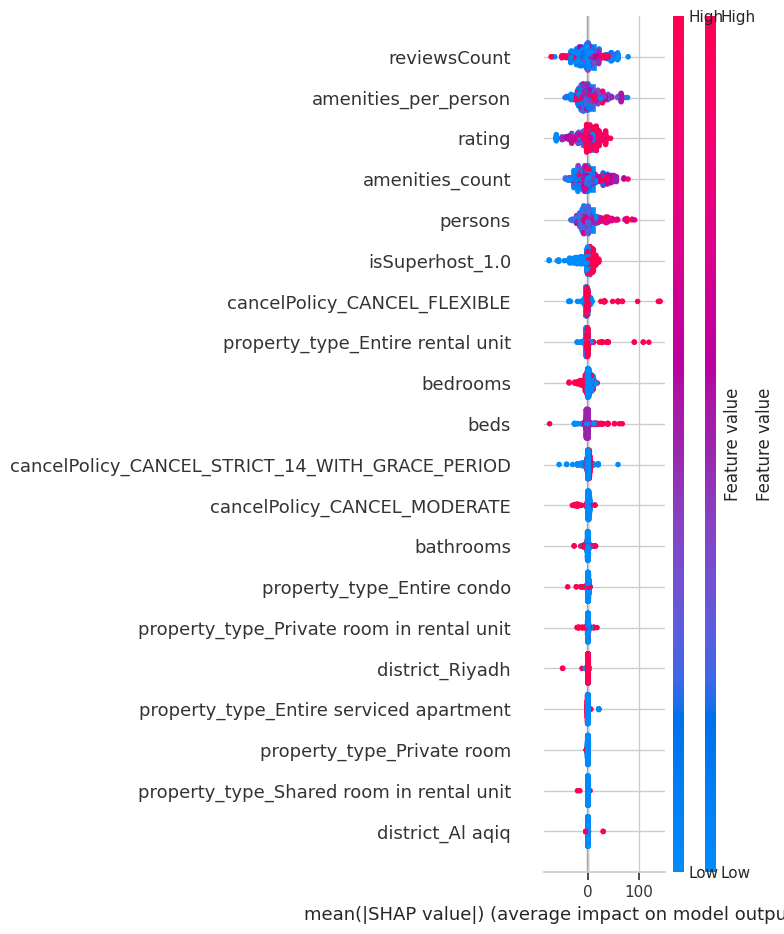

In [47]:
# Feature Importance & SHAP for first target

encoded_cat_cols = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = numeric_features + list(encoded_cat_cols)

for i, target_name in enumerate(targets):
    print(f"\n=== Feature Importance & SHAP for target: {target_name} ===")

    # Feature Importances
    importances = best_model.named_steps['model'].estimators_[i].feature_importances_
    feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)
    print("\nFeature Importances:")
    display(feat_imp)

    # SHAP Explainer
    explainer = shap.TreeExplainer(best_model.named_steps['model'].estimators_[i])
    X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)
    X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=all_features)
    shap_values = explainer.shap_values(X_test_transformed_df)

    # SHAP Summary Plots
    shap.summary_plot(shap_values, X_test_transformed_df, plot_type="dot", show=False)
    shap.summary_plot(shap_values, X_test_transformed_df, plot_type="bar", show=False)

    # Top 10 SHAP Features Summary
    shap_df = pd.DataFrame(shap_values, columns=all_features)
    shap_mean = shap_df.abs().mean().sort_values(ascending=False)

    print("\nTop 10 Features (SHAP impact):")
    for feature in shap_mean.index[:10]:
        mean_shap = shap_df[feature].mean()
        direction = "increase" if mean_shap > 0 else "decrease"
        print(f"- Feature '{feature}' tends to {direction} the predicted value (avg SHAP = {mean_shap:.3f})")

In [49]:
# Summary Table for Evaluation + SHAP
summary_results = []

for i, target_name in enumerate(targets):
    # Evaluation metrics
    y_true = y_test.iloc[:, i]
    y_pred = preds_best[:, i]

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # SHAP Analysis
    explainer = shap.TreeExplainer(best_model.named_steps['model'].estimators_[i])
    X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)
    X_test_transformed_df = pd.DataFrame(
        X_test_transformed,
        columns=numeric_features + list(encoded_cat_cols)
    )
    shap_values = explainer.shap_values(X_test_transformed_df)

    shap_df = pd.DataFrame(shap_values, columns=X_test_transformed_df.columns)
    shap_mean = shap_df.abs().mean().sort_values(ascending=False)
    top5_features = shap_mean.index[:5].tolist()

    summary_results.append({
        "Target": target_name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 3),
        "Top 5 SHAP Features": ", ".join(top5_features)
    })

# Create Summary DataFrame
summary_df = pd.DataFrame(summary_results)
display(summary_df)

Target   MAE   RMSE     R2  \
0  final_price_per_night_SAR  42.7  73.33  0.703   
1              stay_duration   9.8  12.65  0.665   

                                 Top 5 SHAP Features  
0  reviewsCount, amenities_per_person, rating, am...  
1  reviewsCount, amenities_per_person, rating, am...

**Outcome:**

- Feature importances calculated for both targets.

- SHAP values computed and visualized (dot and bar plots).

- Top 10 influential features identified per target.

**Insights:**

- Bedrooms, bathrooms, beds, stay duration, and amenities_count are strong predictors.

- Categorical features like isSuperhost have measurable effects after one-hot encoding.

- High feature values increase predicted price; negative SHAP values decrease predictions.

**Residual Analysis**

**Overview:**

- Analyze residuals to check prediction errors and model reliability.

- Plot distribution, residuals vs predicted values, and QQ plots.

**Purpose:** Validate model assumptions and detect potential patterns in errors.

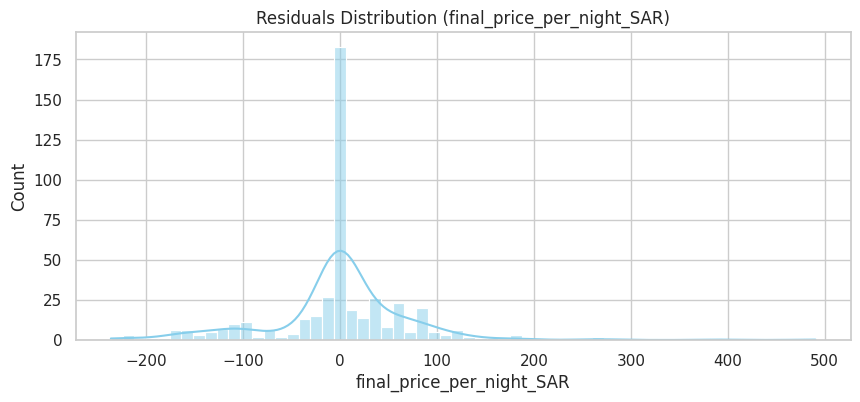

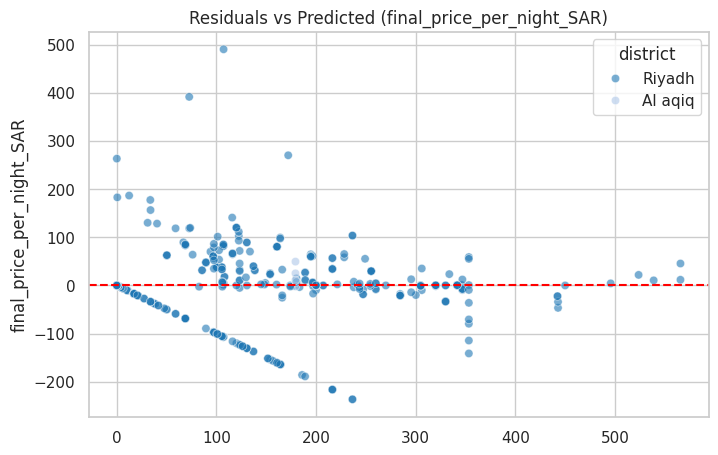

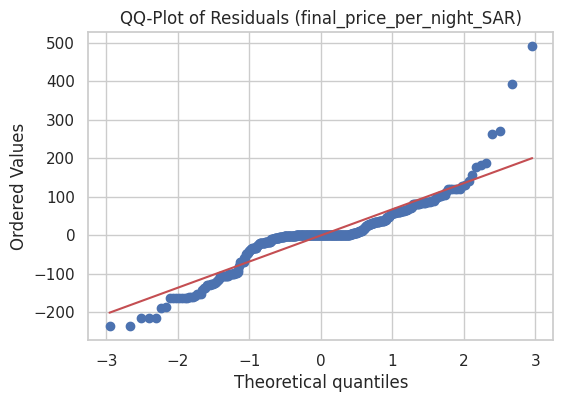

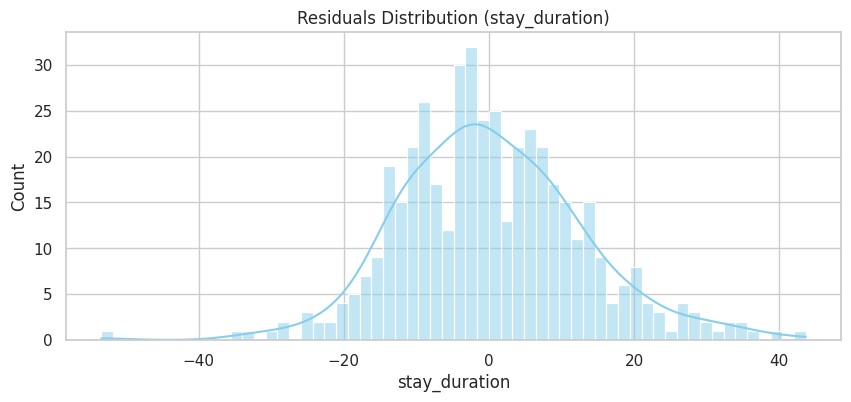

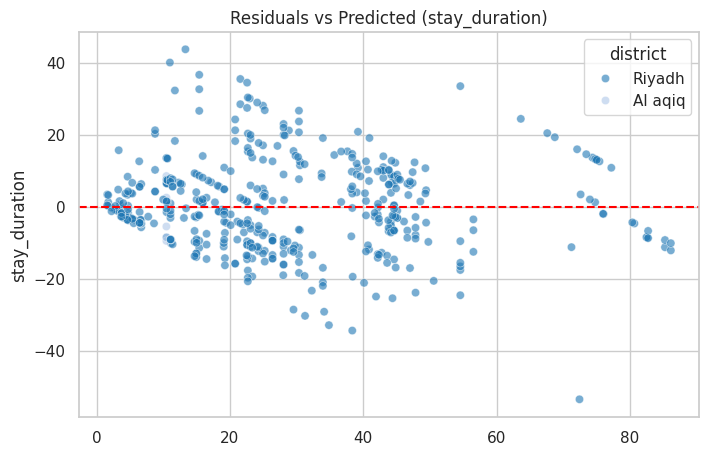

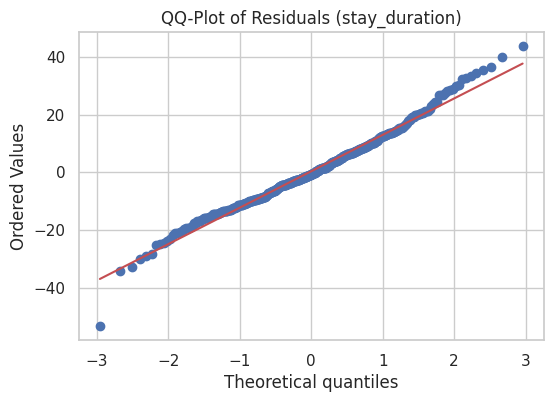

In [50]:
# Residual Analysis per target

for i, target_name in enumerate(targets):
    resid = y_test.iloc[:, i] - preds_best[:, i]

    plt.figure(figsize=(10,4))
    sns.histplot(resid, bins=60, kde=True, color='skyblue')
    plt.title(f"Residuals Distribution ({target_name})")
    plt.show()

    plt.figure(figsize=(8,5))
    sns.scatterplot(x=preds_best[:, i], y=resid, hue=X_test['district'], palette='tab20', alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Residuals vs Predicted ({target_name})")
    plt.show()

    plt.figure(figsize=(6,4))
    stats.probplot(resid, dist="norm", plot=plt)
    plt.title(f"QQ-Plot of Residuals ({target_name})")
    plt.show()

**Outcome:**

- Residuals mostly centered around zero for both targets.

- No strong patterns observed in residual plots.

- QQ plots confirm approximate normality of residuals.

**Model Saving**

**Overview:**

- Save the trained and tuned multi-output Random Forest model for future use.

**Purpose:** Store the model for deployment or subsequent predictions.

In [51]:
# Save the model

joblib.dump(best_model, 'multi_target_price_model_rf.joblib')
print("Model saved as 'multi_target_price_model_rf.joblib'")

Model saved as 'multi_target_price_model_rf.joblib'


**Outcome:**

- Model saved successfully as 'multi_target_price_model_rf.joblib'.

- Ready for loading and predicting new Airbnb property data.